<br>Description: <br>This program uses ensemble models, including Random Forest, AdaBoost, Gradient Boost, and XGB to predict income. The process begins with data exploration and pre-processing. It includes hyperparameter tuning, using graphs to find the optimal value, as well as k-fold cross validation and GridSearchCV to find best combinations of values. The program compares the performance of the four different ensemble models, using the optimal n_estimators value for each. <br><br>

### Table of Contents
##### &emsp; Step 1: Data Exploration and Pre-processing

&emsp; &emsp; &emsp; Setup <br>
&emsp; &emsp; &emsp; Data Quality Report <br>
&emsp; &emsp; &emsp; Missing Data Checks <br>
&emsp; &emsp; &emsp; Cardinality Checks <br>
&emsp; &emsp; &emsp; Scatterplots
&emsp; &emsp; &emsp; Bar Charts <br>
&emsp; &emsp; &emsp; Correlation <br>
&emsp; &emsp; &emsp; Pre-processing <br>

##### &emsp; Step 2: Modeling

&emsp; &emsp; &emsp; Model Setup <br>
&emsp; &emsp; &emsp; Random Forest <br>
&emsp; &emsp; &emsp; Hyperparameter Tuning <br>
&emsp; &emsp; &emsp; AdaBoost <br>
&emsp; &emsp; &emsp; Gradient Boost <br>
&emsp; &emsp; &emsp; XGB <br>
&emsp; &emsp; &emsp; Choosing the Model <br>

##### &emsp; Step 3: Predictor

&emsp; &emsp; &emsp; User Input <br>
&emsp; &emsp; &emsp; Prediction

 <br><br>

## Step 1: Data Exploration & Pre-processing

### Setup

Environment setup and package imports:

In [ ]:
# Optional installations. Uncomment and install if not already installed. It is recommended that you run one line at a time.
# pip3 install plotnine pandas
# pip3 install plotly
# pip3 install girth
# pip3 install --upgrade bottleneck
# pip3 install semopy
# conda install python-graphviz
# pip3 install xgboost

In [1]:
#Package imports:

# Basic visualization and data handling
import math 
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_histogram, facet_wrap, geom_bar
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn import tree, metrics
from sklearn.ensemble import GradientBoostingRegressor
#import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

#Performance Visualization
from matplotlib.legend_handler import HandlerLine2D

These next few steps put our data into a dataframe and provide a first look at the data.

In [4]:
temp = pd.read_csv(r"Sample ACS 2021 for LMU.csv", encoding='latin-1') # read in the data
df=temp.sample(100000)

/var/folders/qh/zhr4gq8s5px2ff46zwfdk90hy3y30j/T/ipykernel_4237/340960427.py:1: DtypeWarning: Columns (5,15,37) have mixed types. Specify dtype option on import or set low_memory=False.


In [5]:
df.iloc[:,15].astype(str)

274840     nan
129473     nan
223431     nan
90705      nan
431605     nan
          ... 
205656     nan
306807    2008
426302     nan
252429     nan
207081     nan
Name: YRNATUR, Length: 100000, dtype: object

In [7]:
df = df[df['INCEARN'] != '$1 or breakeven']
df = df[df['AGE'] != '90 (90+ in 1980 and 1990)']

In [8]:
## print the DataFrame's shape, i.e., number of rows and columns
print(df.shape)

(99999, 42)


In [9]:
df.head() #preview the data

,REGION,STATEFIP,PERWT,NCHILD,SEX,AGE,MARST,MARRNO,RACE,RACED,...,UHRSWORK,INCTOT,INCWAGE,INCINVST,INCOTHER,INCEARN,TRANWORK,TRANTIME,DEPARTS,ARRIVES
274840,Mountain Division,Nevada,117.0,0 children present,Male,60,"Married, spouse present",Married twice (or more),White,White,...,60,773000,0,397000,0,376000,"Auto, truck, or van",20,802,824
129473,South Atlantic Division,Florida,256.0,0 children present,Male,52,Divorced,Married twice (or more),Two major races,White and other race write_in,...,60,23000,23000,0,0,23000,"Auto, truck, or van",30,702,734
223431,New England Division,Massachusetts,169.0,0 children present,Male,49,Separated,Married once,Three or more major races,"White, Black, other race write_in",...,60,170000,170000,0,0,170000,"Auto, truck, or van",15,832,849
90705,New England Division,Connecticut,77.0,0 children present,Male,46,Widowed,Married once,White,White,...,50,50000,50000,0,0,50000,"Auto, truck, or van",20,345,409
431605,West South Central Div.,Texas,13.0,0 children present,Female,64,Divorced,Married once,White,White,...,35,85000,53000,0,0,53000,"Auto, truck, or van",15,832,849


In [10]:
df.tail() #preview the data

,REGION,STATEFIP,PERWT,NCHILD,SEX,AGE,MARST,MARRNO,RACE,RACED,...,UHRSWORK,INCTOT,INCWAGE,INCINVST,INCOTHER,INCEARN,TRANWORK,TRANTIME,DEPARTS,ARRIVES
205656,New England Division,Maine,66.0,0 children present,Female,55,Widowed,Married once,White,White,...,70,88000,70000,200,0,70000,"Auto, truck, or van",12,702,714
306807,Middle Atlantic Division,New York,251.0,2,Male,46,"Married, spouse present",Married once,Two major races,White and other race write_in,...,38,25000,25000,0,0,25000,"Auto, truck, or van",30,602,634
426302,West South Central Div.,Texas,130.0,0 children present,Female,57,Divorced,Married twice (or more),White,White,...,40,40000,40000,0,0,40000,"Auto, truck, or van",75,632,749
252429,East South Central Div.,Mississippi,155.0,0 children present,Female,35,Never married/single,Not Applicable,Black/African American,Black/African American,...,40,27000,27000,0,0,27000,"Auto, truck, or van",30,1305,1334
207081,South Atlantic Division,Maryland,36.0,0 children present,Male,62,Divorced,Married once,White,White,...,40,35000,35000,0,0,35000,"Auto, truck, or van",35,802,839


In [11]:
df.dtypes # This function determines if the feature is categorial or numerical

REGION         object
STATEFIP       object
PERWT         float64
NCHILD         object
SEX            object
AGE            object
MARST          object
MARRNO         object
RACE           object
RACED          object
BPL            object
BPLD           object
ANCESTR1       object
ANCESTR1D      object
CITIZEN        object
YRNATUR        object
LANGUAGE       object
LANGUAGED      object
SPEAKENG       object
EDUC           object
EDUCD          object
DEGFIELD       object
DEGFIELDD      object
DEGFIELD2      object
DEGFIELD2D     object
EMPSTAT        object
EMPSTATD       object
CLASSWKR       object
CLASSWKRD      object
OCCSOC         object
IND             int64
WKSWORK1        int64
UHRSWORK       object
INCTOT          int64
INCWAGE         int64
INCINVST        int64
INCOTHER        int64
INCEARN        object
TRANWORK       object
TRANTIME        int64
DEPARTS         int64
ARRIVES         int64
dtype: object

### Data Quality Report

In [12]:
# Setting display options so that the report will be readable
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [13]:
pd.set_option('display.width', 1000)

In [14]:
# Custom function for creating a data quality report

def data_quality_report(df, report_type):
    continuous_rows = []
    categorical_rows = []
    
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]): 
            count = df[col].count()
            missing_percentage = df[col].isnull().mean() * 100
            cardinality = df[col].nunique()
            first_quartile = df[col].quantile(0.25)
            mean = df[col].mean()
            median = df[col].median()
            third_quartile = df[col].quantile(0.75)
            max_value = df[col].max()
            std_dev = df[col].std()
            
            continuous_rows.append({
                'Feature': col,
                'Count': count,
                '% Missing': missing_percentage,
                'Card.': cardinality,
                '1st Qrt.': first_quartile,
                'Mean': mean,
                'Median': median,
                '3rd Qrt.': third_quartile,
                'Max': max_value,
                'Std. Dev.': std_dev
            })

        else:
            count = df[col].count()
            missing_percentage = df[col].isnull().mean() * 100
            cardinality = df[col].nunique()
            value_counts = df[col].value_counts()
            mode = value_counts.index[0] if not value_counts.empty else 'NA'
            mode_freq = value_counts.iloc[0] if not value_counts.empty else 0
            mode_percentage = (mode_freq / count) * 100 if count > 0 else 0
            second_mode = value_counts.index[1] if len(value_counts) > 1 else 'NA'
            second_mode_freq = value_counts.iloc[1] if len(value_counts) > 1 else 0
            second_mode_percentage = (second_mode_freq / count) * 100 if count > 0 else 0

            categorical_rows.append({
                'Feature': col,
                'Count': count,
                '% Missing': missing_percentage,
                'Card.': cardinality,
                'Mode': mode,
                'Mode Freq.': mode_freq,
                'Mode %': mode_percentage,
                '2nd Mode': second_mode,
                '2nd Mode Freq.': second_mode_freq,
                '2nd Mode %': second_mode_percentage
            })

    continuous_report = pd.DataFrame(continuous_rows)
    categorical_report = pd.DataFrame(categorical_rows)

    if report_type == "cont":
        return continuous_report

    elif report_type == "cat":
        return categorical_report
        
    else:
        raise ValueError("Error: report type options are 'cat' or 'cont'")

In [15]:
dqr_cont = data_quality_report(df,"cont")

In [16]:
dqr_cat = data_quality_report(df,"cat")

#### Data Quality Report: Continuous Features

In [19]:
dqr_cont

,Feature,Count,% Missing,Card.,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.
0,PERWT,99999,0.0,797,53.0,107.374134,81.0,131.0,2471.0,92.068644
1,IND,99999,0.0,262,4670.0,6188.854579,7270.0,8170.0,9590.0,2661.938835
2,WKSWORK1,99999,0.0,3,52.0,51.980270,52.0,52.0,52.0,0.190792
3,INCTOT,99999,0.0,5127,36000.0,80769.929679,57000.0,92000.0,1309000.0,87358.914349
4,INCWAGE,99999,0.0,852,33000.0,72965.800798,53000.0,86000.0,787000.0,78403.037847
5,INCINVST,99999,0.0,524,0.0,1809.276933,0.0,0.0,522000.0,17659.182812
6,INCOTHER,99999,0.0,371,0.0,347.247952,0.0,0.0,76000.0,2795.135879
7,TRANTIME,99999,0.0,125,5.0,21.246992,15.0,30.0,163.0,22.254377
8,DEPARTS,99999,0.0,151,502.0,629.376734,702.0,802.0,2345.0,432.524783
9,ARRIVES,99999,0.0,286,524.0,659.531785,719.0,824.0,2359.0,441.815000


This is our target feature.

#### Data Quality Report: Categorical Features

In [20]:
dqr_cat

,Feature,Count,% Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,REGION,99999,0.000000,9,South Atlantic Division,19979,19.979200,Pacific Division,15501,15.501155
1,STATEFIP,99999,0.000000,51,California,11310,11.310113,Texas,8076,8.076081
2,NCHILD,99999,0.000000,10,0 children present,55127,55.127551,1 child present,19399,19.399194
3,SEX,99999,0.000000,2,Male,55836,55.836558,Female,44163,44.163442
4,AGE,99999,0.000000,153,50,2012,2.012020,30,1890,1.890019
5,MARST,99999,0.000000,6,"Married, spouse present",58639,58.639586,Never married/single,25689,25.689257
6,MARRNO,99999,0.000000,4,Married once,58641,58.641586,Not Applicable,25689,25.689257
7,RACE,99999,0.000000,9,White,67989,67.989680,Two major races,9308,9.308093
8,RACED,99999,0.000000,138,White,67989,67.989680,Black/African American,8032,8.032080
9,BPL,99999,0.000000,123,California,8109,8.109081,New York,6400,6.400064


#### Missing Data Checks

Show features with more than 60% of observations missing data.

In [21]:
dqr_cat[dqr_cat['% Missing'] > 60]

,Feature,Count,% Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
13,CITIZEN,16899,83.100831,3,Naturalized citizen,9207,54.482514,Not a citizen,6623,39.191668
14,YRNATUR,9207,90.792908,136,2019.0,254,2.758771,2008.0,225,2.443793
22,DEGFIELD2,4958,95.041950,35,Business,929,18.737394,Social Sciences,595,12.000807
23,DEGFIELD2D,4958,95.041950,164,Business Management and Administration,217,4.376765,Psychology,194,3.912868


In [22]:
df.loc[:,['DEGFIELD', 'DEGFIELDD', 'DEGFIELD2', 'DEGFIELD2D']].tail(25)

,DEGFIELD,DEGFIELDD,DEGFIELD2,DEGFIELD2D
358660,"Physical Fitness, Parks, Recreation, and Leisure","Physical Fitness, Parks, Recreation, and Leisure",NaN,NaN
298561,Psychology,Psychology,NaN,NaN
152413,Mathematics and Statistics,Mathematics,Computer and Information Sciences,Computer Science
50571,NaN,NaN,NaN,NaN
3516,NaN,NaN,NaN,NaN
102814,Social Sciences,Political Science and Government,Linguistics and Foreign Languages,"French, German, Latin and Other Common Foreign..."
212742,Education Administration and Teaching,Special Needs Education,NaN,NaN
152733,Engineering,Miscellaneous Engineering,NaN,NaN
351515,NaN,NaN,NaN,NaN
469837,"English Language, Literature, and Composition",English Language and Literature,NaN,NaN


Looks like DEGFIELD is more general than DEGFIELDD. Likewise, DEGFIELD2 is more general than DEGFIELD2D. We will drop one set.

In [23]:
dqr_cont[dqr_cont['% Missing'] > 60]

,Feature,Count,% Missing,Card.,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.


There is no missing data in this dataset.

#### Cardinality Checks

Next, we check for unusually high or low cardinality.

In [24]:
# Checking for features with a cardinality of 1. 
# If a feature has cardinality of 1, we drop it, because it has no use; all the values are the same.
dqr_cat[dqr_cat['Card.'] == 1]

,Feature,Count,% Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
24,EMPSTAT,99999,0.0,1,Employed,99999,100.0,NA,0,0.0
25,EMPSTATD,99999,0.0,1,At work,99999,100.0,NA,0,0.0


In [25]:
# Same check for the continuous features
dqr_cont[dqr_cont['Card.'] == 1]

,Feature,Count,% Missing,Card.,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.


In [26]:
# Checking for continuous features that have too low a cardinality. These may actually be encoded categorical features.
dqr_cont[dqr_cont['Card.'] < 30]

,Feature,Count,% Missing,Card.,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.
2,WKSWORK1,99999,0.0,3,52.0,51.98027,52.0,52.0,52.0,0.190792


This is our target column and it has a binary encoding of 0 and 1.

In [28]:
# Assign any encoded categorical columns to cont_convert so they are graphed as if they are categorical.
cont_convert = 'y'

In [29]:
# Checking for categorical features that have too high a cardinality. These may just be unique identifiers and can be dropped.
dqr_cat[dqr_cat['Card.'] > 50]

,Feature,Count,% Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
1,STATEFIP,99999,0.000000,51,California,11310,11.310113,Texas,8076,8.076081
4,AGE,99999,0.000000,153,50,2012,2.012020,30,1890,1.890019
8,RACED,99999,0.000000,138,White,67989,67.989680,Black/African American,8032,8.032080
9,BPL,99999,0.000000,123,California,8109,8.109081,New York,6400,6.400064
10,BPLD,99999,0.000000,219,California,8109,8.109081,New York,6400,6.400064
11,ANCESTR1,99999,0.000000,204,Not Reported,18687,18.687187,German,11454,11.454115
12,ANCESTR1D,99999,0.000000,230,Not Reported,18687,18.687187,"German (1990-2000, ACS/PRCS)",11362,11.362114
14,YRNATUR,9207,90.792908,136,2019.0,254,2.758771,2008.0,225,2.443793
15,LANGUAGE,99999,0.000000,63,English,79874,79.874799,Spanish,11093,11.093111
16,LANGUAGED,99999,0.000000,114,English,79830,79.830798,Spanish,11093,11.093111


Our features are binned, so, as expected, they all have relatively low cadinality.

In [30]:
# Make a copy of the dataframe and assign it as our analytics base table (abt). The original df will remain unaltered.
abt=df.copy()

### Data Exploration

To start exploring, we divide the ABT dataframe into two feature sets: continuous features and categorical features.

In [31]:
# Declare empty lists for the categorical columns and the continuous columns
categorical_cols = []
continuous_cols = []

#Define continuous and categorial columns from the abt:
for col in abt.columns:
    if pd.api.types.is_numeric_dtype(abt[col]):
        continuous_cols.append(col)
    else:
        categorical_cols.append(col)

# Transfer any continous columns that were identified as encoded categorical columns in the cardinality checks.
#continuous_cols.remove(cont_convert)
#categorical_cols.append(cont_convert)

In [32]:
# Check the output
abt[categorical_cols].head()

,REGION,STATEFIP,NCHILD,SEX,AGE,MARST,MARRNO,RACE,RACED,BPL,BPLD,ANCESTR1,ANCESTR1D,CITIZEN,YRNATUR,LANGUAGE,LANGUAGED,SPEAKENG,EDUC,EDUCD,DEGFIELD,DEGFIELDD,DEGFIELD2,DEGFIELD2D,EMPSTAT,EMPSTATD,CLASSWKR,CLASSWKRD,OCCSOC,UHRSWORK,INCEARN,TRANWORK
274840,Mountain Division,Nevada,0 children present,Male,60,"Married, spouse present",Married twice (or more),White,White,Nevada,Nevada,Russian,Russian,NaN,NaN,English,English,"Yes, speaks only English",5+ years of college,Professional degree beyond a bachelor's degree,Business,Business Management and Administration,Business,Accounting,Employed,At work,Self-employed,"Self-employed, not incorporated",2310XX,60,376000,"Auto, truck, or van"
129473,South Atlantic Division,Florida,0 children present,Male,52,Divorced,Married twice (or more),Two major races,White and other race write_in,Texas,Texas,Spaniard,"Spaniard (1990-2000, ACS, PRCS)",NaN,NaN,Spanish,Spanish,"Yes, speaks well",Grade 12,"Some college, but less than 1 year",NaN,NaN,NaN,NaN,Employed,At work,Works for wages,"Wage/salary, private",472061,60,23000,"Auto, truck, or van"
223431,New England Division,Massachusetts,0 children present,Male,49,Separated,Married once,Three or more major races,"White, Black, other race write_in",Central America,El Salvador,Salvadoran,Salvadoran,Not a citizen,NaN,Spanish,Spanish,"Yes, speaks very well","Grade 5, 6, 7, or 8",Grade 5,NaN,NaN,NaN,NaN,Employed,At work,Works for wages,"Wage/salary, private",533030,60,170000,"Auto, truck, or van"
90705,New England Division,Connecticut,0 children present,Male,46,Widowed,Married once,White,White,California,California,English,English,NaN,NaN,English,English,"Yes, speaks only English",Grade 12,Regular high school diploma,NaN,NaN,NaN,NaN,Employed,At work,Works for wages,"Wage/salary, private",435071,50,50000,"Auto, truck, or van"
431605,West South Central Div.,Texas,0 children present,Female,64,Divorced,Married once,White,White,Texas,Texas,English,English,NaN,NaN,English,English,"Yes, speaks only English",1 year of college,"1 or more years of college credit, no degree",NaN,NaN,NaN,NaN,Employed,At work,Works for wages,Wage/salary at non-profit,119151,35,53000,"Auto, truck, or van"


In [33]:
# Check the output
abt[continuous_cols].head()

,PERWT,IND,WKSWORK1,INCTOT,INCWAGE,INCINVST,INCOTHER,TRANTIME,DEPARTS,ARRIVES
274840,117.0,770,52,773000,0,397000,0,20,802,824
129473,256.0,770,52,23000,23000,0,0,30,702,734
223431,169.0,6170,52,170000,170000,0,0,15,832,849
90705,77.0,4470,52,50000,50000,0,0,20,345,409
431605,13.0,9190,52,85000,53000,0,0,15,832,849


#### 3A. Data Distribution

##### Histograms

In [34]:
from plotnine import ggplot, aes, geom_histogram, facet_wrap, theme, element_text, theme_classic, scale_y_continuous

# Melt the DataFrame to long format
abt_cont_melted = abt[continuous_cols].melt(var_name='column', value_name='value')

# Calculate the number of rows and columns for the facet grid
n_cols = 4
n_rows = math.ceil(len(continuous_cols) / n_cols)

# Create the plot
cont_plot = (ggplot(abt_cont_melted, aes(x='value')) +
    geom_histogram(bins=20, fill='deepskyblue', color='black', size=0.1) +  # Add thin line around bars
    facet_wrap('~column', nrow=n_rows, ncol=n_cols, scales='free_x') +
    theme_classic() +  # Apply classic theme
    theme(panel_spacing=0.03,  # Adjust the spacing between panels
        figure_size=(80/n_cols, n_rows * 4),  # Dynamically set figure size based on number of columns and rows
        strip_text_x=element_text(size=10),
        axis_text=element_text(size=8)  # Adjust axis text size for a tighter layout
        #axis_title=element_text(size=10),  # Option to increase axis title size
        #plot_title=element_text(size=12)  # Option to increase plot title size
                 ) +
    scale_y_continuous(expand=(0, 0))  # Force the y-axis to start at zero
)

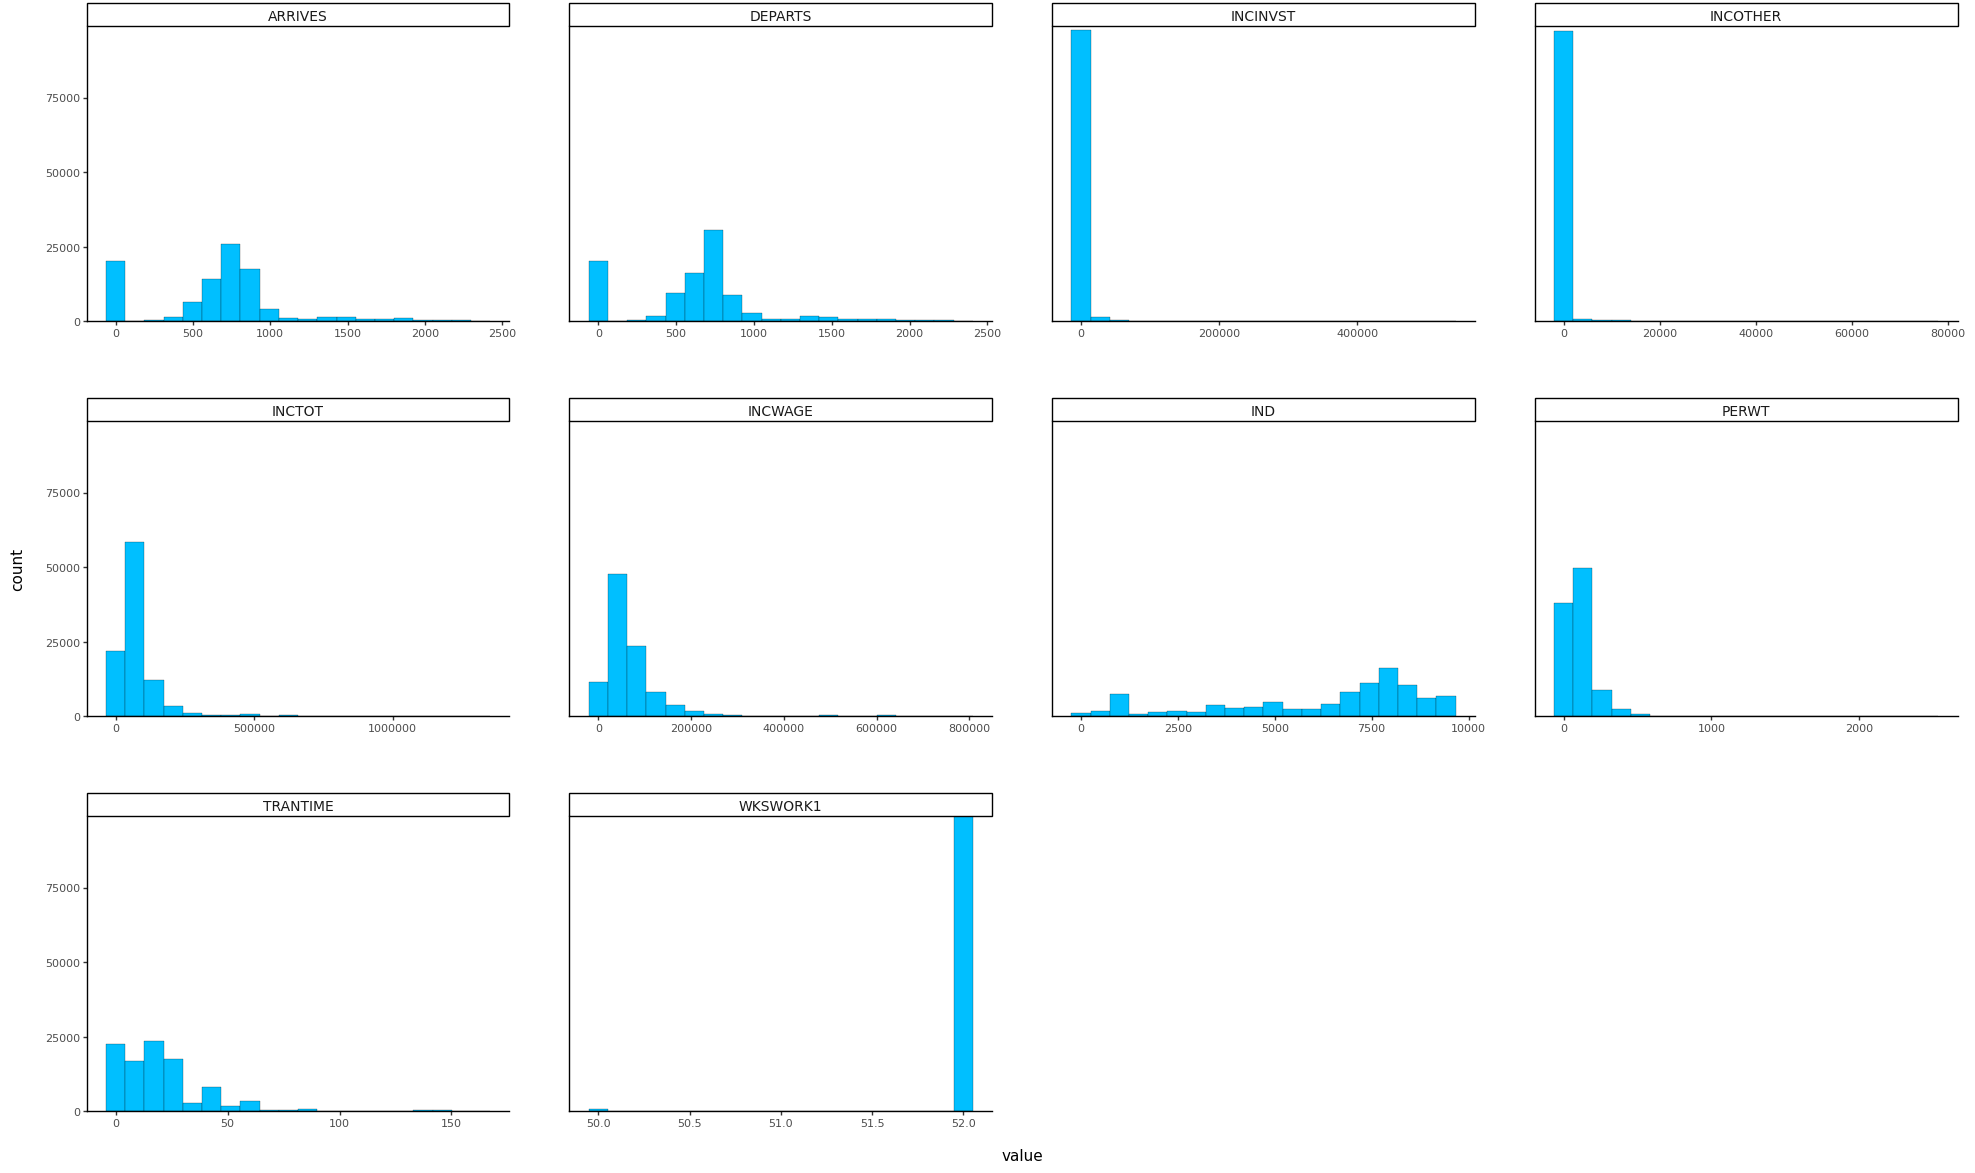

In [35]:
cont_plot.draw()

#### Bar Plots

All of our data can be graphed using bar charts, since it came binned.

In [36]:
small_cat = dqr_cat.loc[dqr_cat['Card.'] < 30, 'Feature'].tolist()
small_cat.remove('EMPSTAT')
small_cat.remove('EMPSTATD')

In [37]:
from plotnine import (
    ggplot, aes, geom_bar, facet_wrap, theme_classic, theme, element_text, ggsave)

# Melt categorical columns for visualization
abt_cat_melted = abt[small_cat].melt(var_name='column', value_name='value')

# Design bar plots 
cat_plot = (
    ggplot(abt_cat_melted, aes(x='value')) +
    geom_bar(fill='deepskyblue', color='black', size=0.1) +  # Add thin line around bars
    facet_wrap('~column', nrow=12, ncol=3, scales='free_x') +
    theme_classic() +  # Apply classic theme
    theme(
        panel_spacing=0.005,  # Adjust space between panels
        figure_size=(20, 30),  # Increase the figure size (width, height)
        strip_text_x=element_text(size=8),  # Increase facet label size
        axis_text_x=element_text(size=9, angle=20),
        axis_text=element_text(size=8),  # Increase axis text size
        axis_title=element_text(size=11),  # Adjust axis title size
        # plot_title=element_text(size=36)  # Uncomment for plot title size
    )
)

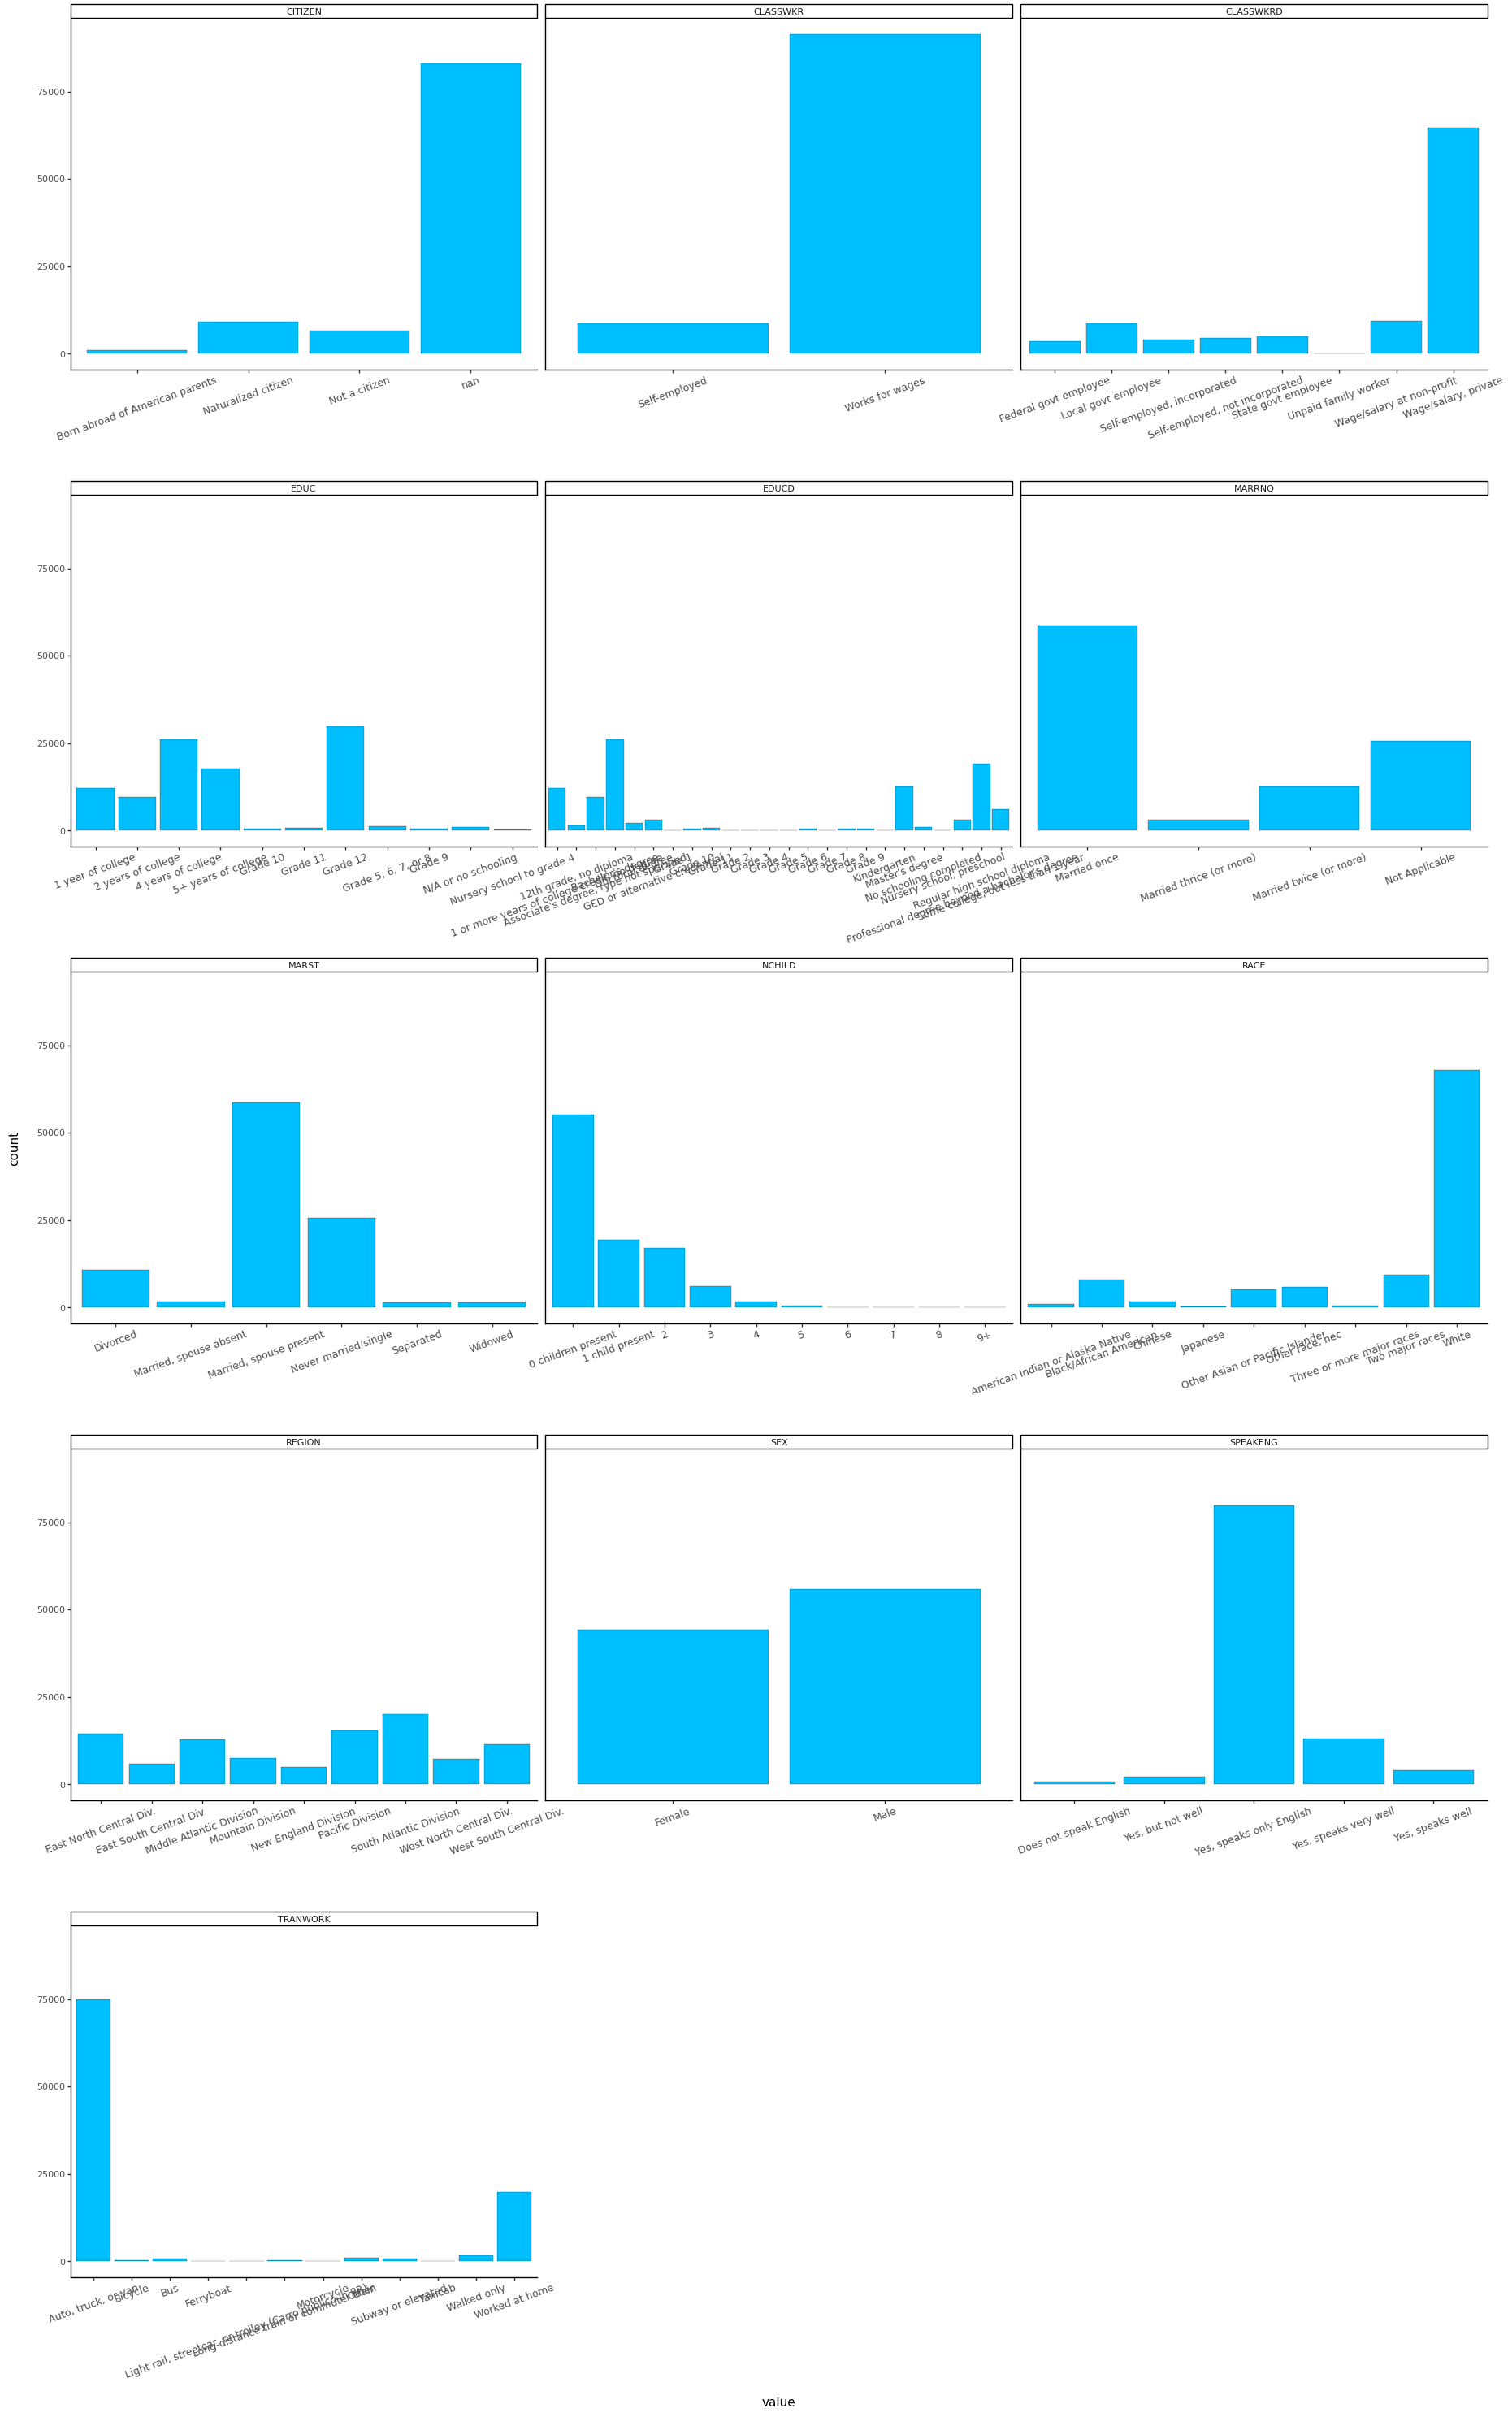

In [38]:
cat_plot.draw()

##### Bar Plots By Class and Feature

Next, we explore relationships in our data by comparing the fequency of out target class to the fequency of those outside that class, across different features.

In [39]:
# TBD - target column to be identified

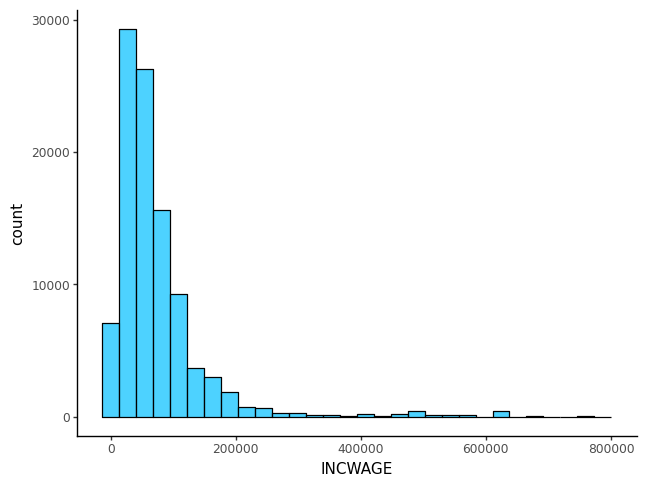

In [48]:
from plotnine import geom_histogram

# Filter only income for this plot
income_plot = (
    ggplot(abt, aes(x='INCWAGE')) +
    geom_histogram(bins=30, position='dodge', fill = 'deepskyblue',color='black', alpha=0.7) +
    theme_classic()
)
income_plot.draw()

In [49]:
# Melt categorical columns for visualization
# abt_cat_melted = abt.melt(id_vars=['INCWAGE'], value_vars=categorical_cols, var_name='column', value_name='value')

# Design bar plots 
# y_plot = (
#     ggplot(abt_cat_melted, aes(x='value', fill='factor(y)')) +
#     geom_bar(position='dodge', color='deepskyblue', size=0.1) +  # Add thin line around bars
#     facet_wrap('~column', nrow=12, ncol=3, scales='free_x') +
#     theme_classic() +  # Apply classic theme
#     theme(
#         panel_spacing=0.005,  # Adjust space between panels
#         figure_size=(10, 12),  # Increase the figure size (width, height)
#         strip_text_x=element_text(size=8),  # Increase facet label size
#         axis_text_x=element_text(size=9, angle=20),
#         axis_text=element_text(size=8),  # Increase axis text size
#         axis_title=element_text(size=11),  # Adjust axis title size
#     )
# )

In [50]:
#y_plot.draw()

From this visualization, it looks like our target class of >50K ('1') is associated with the 'income' workclass, 'high' race_sex, 'high' msr, and education level of a bachelors degree and above. Note that the relative frequency of the target class '1' is higher for these features than the others; the aqua bars are closer in size to the adjacent red bar in these features. The highest relative frequency of our target class '1' is associated with the 40-55 age group. 

## Relationships

##### Scatterplots

In [51]:
## create a pairplot to visualize the relationships between multiple numeric columns
# This may take a while to render and will not show in the GitHub Preview. Uncomment to run this in JupyterLab.
sns.pairplot(abt[continuous_cols])

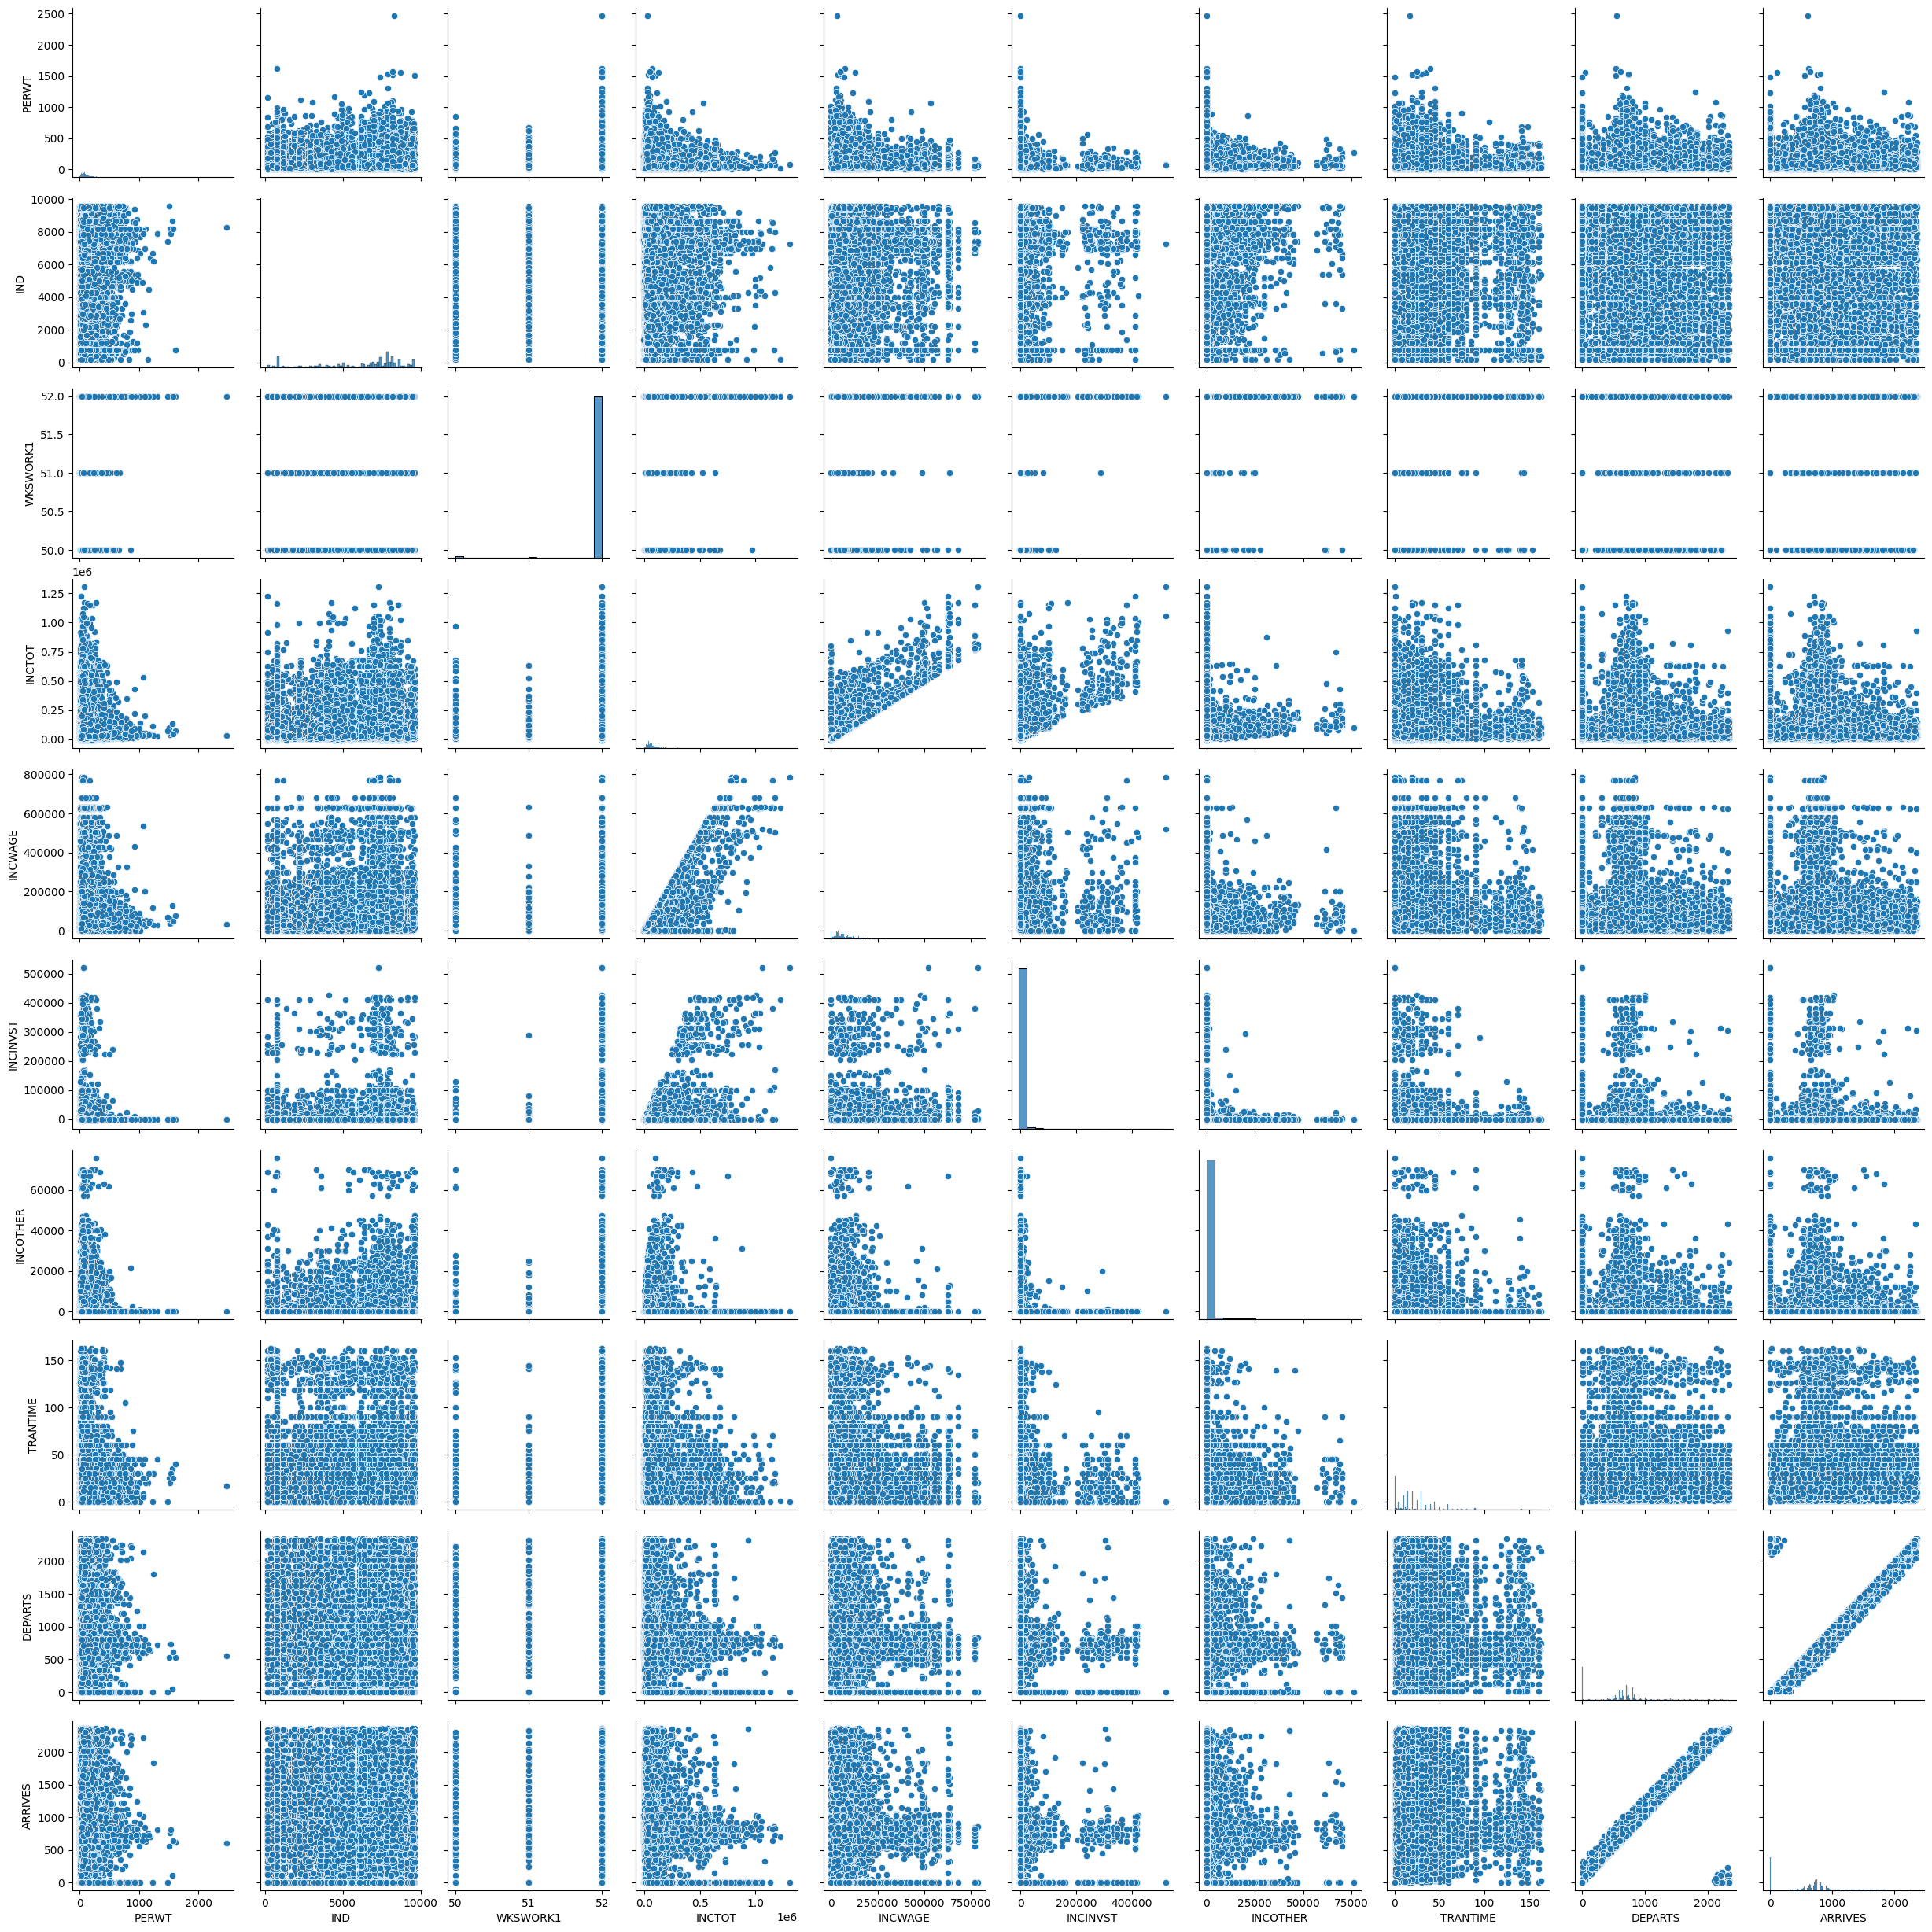

In [52]:
plt.show()

Based on the shape of PERWT and INCTOT, the distribution of income is wider when a person's weight is lower. We should be cautious about using this feature, however, because income can affect the food available, i.e., fast food rather than healthy food. The causal relationaship is in the opposite direction from what would be needed to PREDICT income. The same is true about transit time.

##### Correlation

In [53]:
correlation_matrix = abt[continuous_cols].corr()

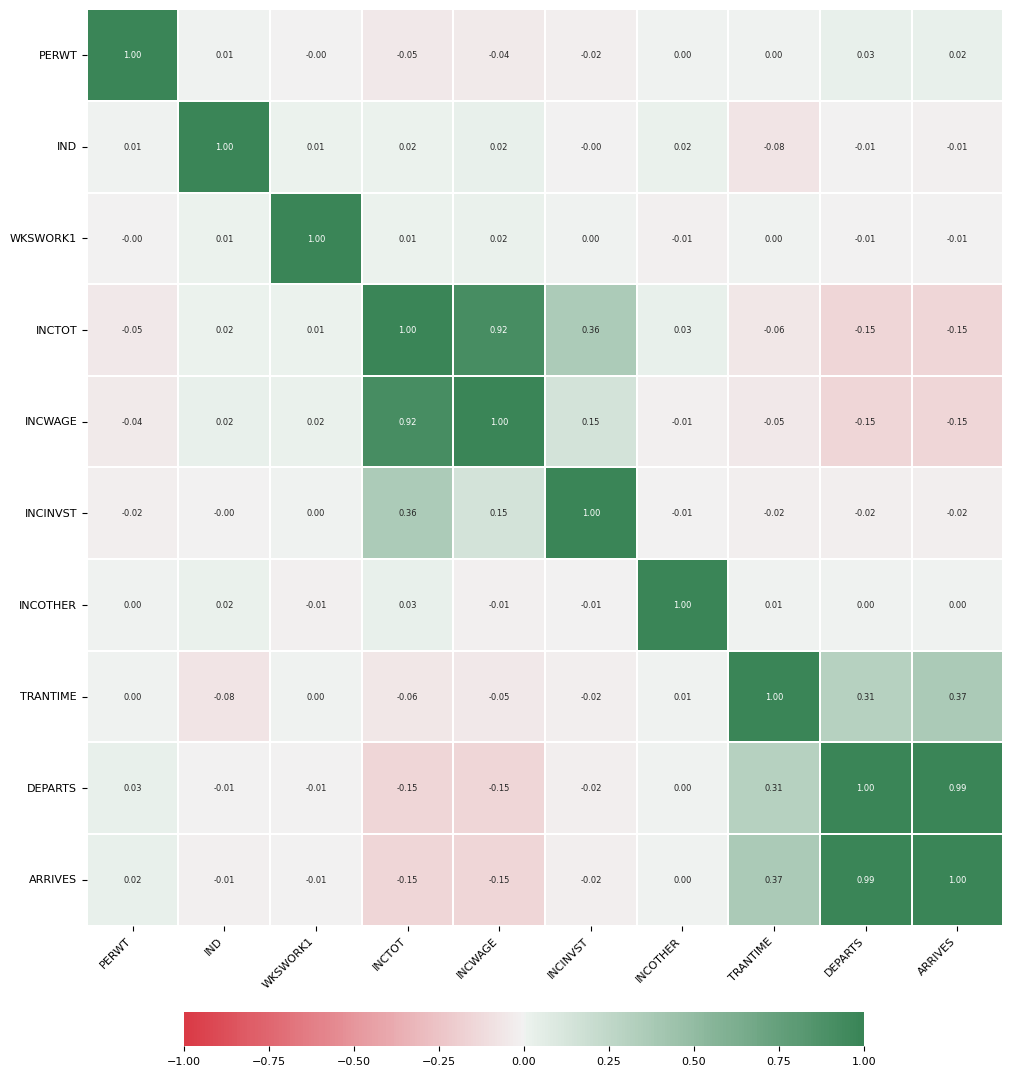

In [54]:
plt.figure(figsize=(17, 17))

axis_corr = sns.heatmap(
correlation_matrix,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(10, 500, n=500),
    square=True,
    annot=True,  # Show correlation coefficients in each square
    fmt=".2f", # Format the coefficients to 2 decimal places
    annot_kws={"size": 6},  # Set font size for correlation coefficients
    linewidths=.1,  # Add lines between squares for better visibility
    cbar_kws={"shrink": .60, "orientation": "horizontal"}  # Adjust color bar (legend) size
)

# Sets the font size and rotation for the x and y axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Adjust the position of the color legend
cbar = axis_corr.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_position([0.2, 0.27, 0.6, 0.02])

#for text in axis_corr.texts:
    #text.set_visible(True)

plt.show()

In [55]:
# Now we create a filtered correlation matrix that only shows features with moderate to strong correlations.
# This doesn't mean all correlations shown are strong, but that features with only weak correlations have been removed for readability.

filtered_corr_matrix = correlation_matrix.copy()
for col in correlation_matrix.columns:
    if ((correlation_matrix[col].abs() <= 0.4).all()) or ((correlation_matrix[col].abs() <= 0.4).sum() == len(correlation_matrix) - 1):
        filtered_corr_matrix.drop(col, axis=1, inplace=True)
        filtered_corr_matrix.drop(col, axis=0, inplace=True)

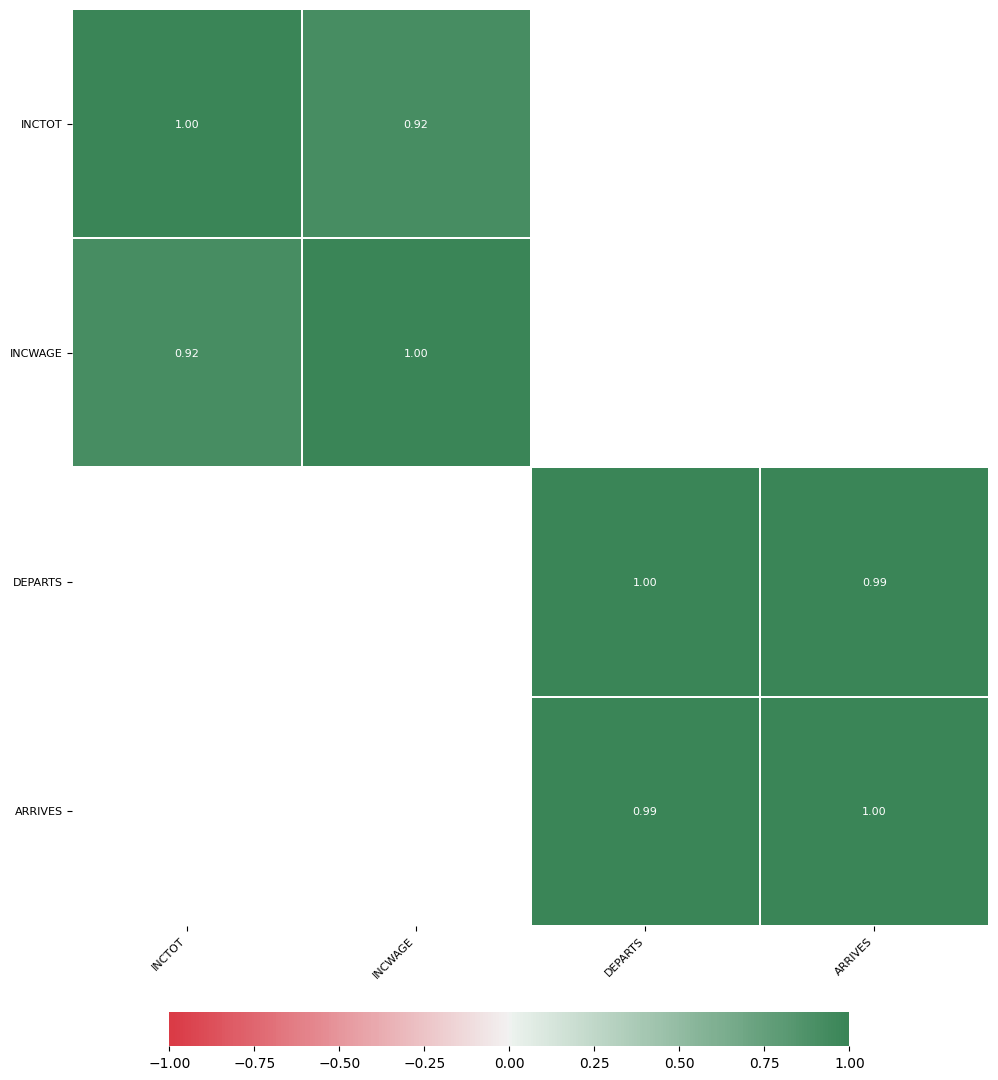

In [56]:
# visualizing correlations >.4

plt.figure(figsize=(17, 17))

axis_corr = sns.heatmap(
filtered_corr_matrix[filtered_corr_matrix.abs() > .4],
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(10, 500, n=500),
    square=True,
    annot=True,  # Show correlation coefficients in each square
    fmt=".2f", # Format the coefficients to 2 decimal places
    annot_kws={"size": 8},  # Set font size for correlation coefficients
    linewidths=.1, # Add lines between squares for better visibility
    cbar_kws={"shrink": .60, "orientation": "horizontal"}  # Adjust color bar (legend) size
)

# Sets the font size and rotation for the x and y axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Adjust the position of the color legend
cbar = axis_corr.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_position([0.2, 0.27, 0.6, 0.02])

#for text in axis_corr.texts:
    #text.set_visible(True)

plt.show()

Very high multicollinearity on some features

<br>

### Cramer's V Correlation Matrix

In order to understand the relationship between features, we will use a correlation matrix. Cramer's matrix is suitable for categorical variables and ranges from 0 (no association) to 1 (high association).

In [ ]:
#abt_e = abt.drop(['flag'], axis = 1, inplace=False)

In [ ]:
#abt_e = abt.copy()

In [57]:
from scipy.stats import chi2_contingency

def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))  # Cross table building
    if crosstab.size == 0:
        return 0  # Handle empty cross table
    stat = chi2_contingency(crosstab)[0]  # Keeping the test statistic of the Chi2 test
    obs = np.sum(crosstab)  # Number of observations
    mini = min(crosstab.shape) - 1  # Take the minimum value between the columns and the rows of the cross table
    if mini == 0 or obs == 0:
        return 0  # Handle division by zero
    return np.sqrt(stat / (obs * mini))

In [58]:

from scipy.stats import chi2_contingency

rows = []

for var1 in abt[categorical_cols]:
    col = []
    for var2 in abt[categorical_cols]:
        cramers = cramers_V(abt[categorical_cols][var1], abt[categorical_cols][var2])  # Cramer's V test
        col.append(round(cramers, 2))  # Keeping the rounded value of the Cramer's V
    rows.append(col)

cramers_results = np.array(rows)
matrix = pd.DataFrame(cramers_results, columns=abt[categorical_cols].columns, index=abt[categorical_cols].columns)


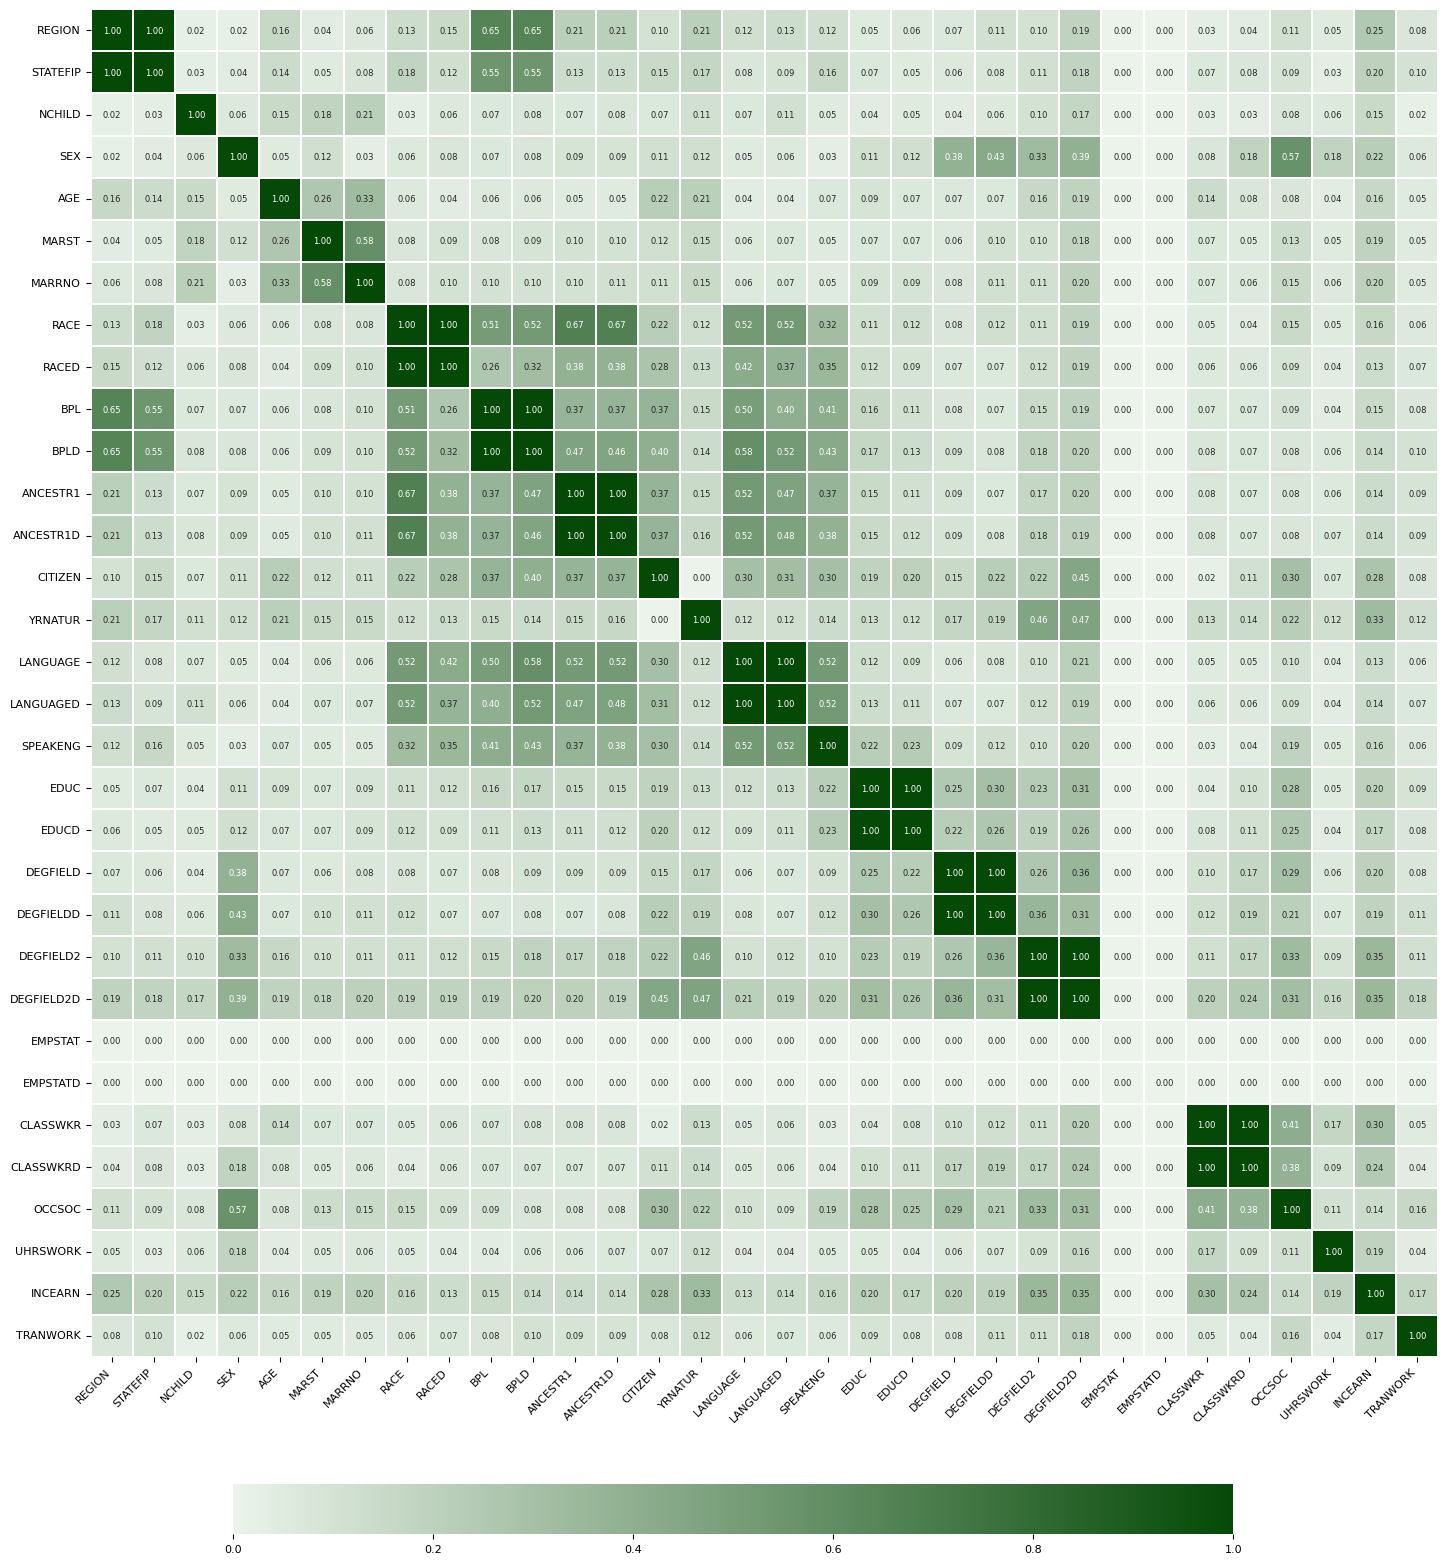

In [59]:
plt.figure(figsize=(25, 25))

axis_corr = sns.heatmap(
matrix,
vmin=0, vmax=1, center=0.5,
cmap = sns.light_palette("darkgreen", as_cmap=True, input="xkcd"),
    square=True,
    annot=True,  # Show correlation coefficients in each square
    fmt=".2f", # Format the coefficients to 2 decimal places
    annot_kws={"size": 6},  # Set font size for correlation coefficients
    linewidths=.1,  # Add lines between squares for better visibility
    cbar_kws={"shrink": .60, "orientation": "horizontal"}  # Adjust color bar (legend) size
)

# Sets the font size and rotation for the x and y axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Adjust the position of the color legend
cbar = axis_corr.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_position([0.2, 0.27, 0.6, 0.02])

#for text in axis_corr.texts:
    #text.set_visible(True)

plt.show()

<br>

This matrix shows us that the features with "D" are perfectly correlated with the features that have the same name without 'D'. We can eliminate one of these. <br>
Degree and occupation have a strong association, unsurprisingly. Citizen and occupation have a high association. Class of the worker has high association with DEGFIELD2D. This needs more review.

In [60]:
abt.loc[:, ['EDUC','EDUCD']].head(10)

,EDUC,EDUCD
274840,5+ years of college,Professional degree beyond a bachelor's degree
129473,Grade 12,"Some college, but less than 1 year"
223431,"Grade 5, 6, 7, or 8",Grade 5
90705,Grade 12,Regular high school diploma
431605,1 year of college,"1 or more years of college credit, no degree"
34723,Grade 10,Grade 10
7532,5+ years of college,Master's degree
37637,1 year of college,"1 or more years of college credit, no degree"
279757,4 years of college,Bachelor's degree
210780,4 years of college,Bachelor's degree


## Pre-Processing

#### Drop Features and Rows

In [61]:
# 
feature_names = abt.columns.tolist()

D_features = [f for f in feature_names if f + 'D' in feature_names]
D_features = [f + 'D' for f in D_features]

print(D_features)

['RACED', 'BPLD', 'ANCESTR1D', 'LANGUAGED', 'EDUCD', 'DEGFIELDD', 'DEGFIELD2D', 'EMPSTATD', 'CLASSWKRD']


In [62]:
abt.drop(D_features, axis = 1, inplace = True)

In [63]:
# Dropping features with cardinality of 1
abt.drop(['EMPSTAT'], axis=1, inplace =True)

In [64]:
#Dropping departs because of multicollinearity
abt.drop('DEPARTS', axis = 1, inplace = True)

In [65]:
#Dropping departs because of multicollinearity
continuous_cols.remove('DEPARTS')

In [66]:
abt.drop(['YRNATUR'], axis=1, inplace=True)

In [67]:
abt.drop(['CITIZEN'], axis=1, inplace=True)

In [68]:
abt.drop(['INCEARN', 'INCINVST', 'INCOTHER', 'INCTOT'], axis=1, inplace=True)

In [69]:
abt['AGE'] = abt['AGE'].astype(int)

In [70]:
abt['OCCSOC'] = abt['OCCSOC'].astype(str)

In [71]:
abt['INCWAGE'] = abt['INCWAGE'].astype(int)

In [72]:
abt['TRANTIME'] = abt['TRANTIME'].astype(int)

In [73]:
abt.drop(['ARRIVES'], axis=1, inplace =True)

In [74]:
abt.drop(['MARRNO'], axis=1, inplace =True)

In [75]:
Q1 = abt['AGE'].quantile(0.25)
Q3 = abt['AGE'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the rows where 'AGE' is outside the bounds
abt = abt[(abt['AGE'] >= lower_bound) & (abt['AGE'] <= upper_bound)]

In [76]:
Q1 = abt['INCWAGE'].quantile(0.25)
Q3 = abt['INCWAGE'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate the lower and upper bounds
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# Step 3: Filter out the rows where 'AGE' is outside the bounds
abt = abt[(abt['INCWAGE'] >= lower_bound) & (abt['INCWAGE'] <= upper_bound)]

In [77]:
Q1 = abt['TRANTIME'].quantile(0.25)
Q3 = abt['TRANTIME'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate the lower and upper bounds
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Step 3: Filter out the rows where 'AGE' is outside the bounds
abt = abt[(abt['TRANTIME'] >= lower_bound) & (abt['TRANTIME'] <= upper_bound)]

In [78]:
print(abt.shape)

(93885, 23)


#### Imputation and Calculations

In [79]:
dqr_cat[dqr_cat['% Missing'] > 0]

,Feature,Count,% Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
13,CITIZEN,16899,83.100831,3,Naturalized citizen,9207,54.482514,Not a citizen,6623,39.191668
14,YRNATUR,9207,90.792908,136,2019.0,254,2.758771,2008.0,225,2.443793
20,DEGFIELD,43923,56.076561,37,Business,9335,21.253102,Engineering,4141,9.427862
21,DEGFIELDD,43923,56.076561,172,Business Management and Administration,2651,6.035562,Psychology,1965,4.473738
22,DEGFIELD2,4958,95.041950,35,Business,929,18.737394,Social Sciences,595,12.000807
23,DEGFIELD2D,4958,95.041950,164,Business Management and Administration,217,4.376765,Psychology,194,3.912868


#### Outlier Handling

Let's review the outliers before trimming them.

In [80]:
pd.set_option('display.max_colwidth', None)

In [81]:
outliers_df = pd.DataFrame(columns=['Feature', 'Outliers'])

for col in abt[continuous_cols].columns:
    outliers = []
    Q1 = abt[col].quantile(0.25)
    Q3 = abt[col].quantile(0.75)
    IQR = Q3 - Q1
    for value in abt[col].dropna():  # Ignore NaN values
        if (value < (Q1 - (1.5 * IQR))) or (value > (Q3 + (1.5 * IQR))):
            outliers.append(value)
    outliers_df = pd.concat([outliers_df, pd.DataFrame({'Feature': [col], 'Outliers': [sorted(outliers)]})], ignore_index=True)

KeyError: "['INCTOT', 'INCINVST', 'INCOTHER', 'ARRIVES'] not in index"

In [84]:
outliers_df = pd.DataFrame(columns=['Feature', 'Outliers'])

# Only process columns that exist in the DataFrame
for col in [c for c in continuous_cols if c in abt.columns]:
    try:
        Q1 = abt[col].quantile(0.25)
        Q3 = abt[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = abt[col][(abt[col] < lower_bound) | (abt[col] > upper_bound)].tolist()
        
        if outliers:  # Only add if outliers exist
            outliers_df = pd.concat([
                outliers_df, 
                pd.DataFrame({'Feature': [col], 'Outliers': [sorted(outliers)]})
            ], ignore_index=True)
    except Exception as e:
        print(f"Error processing {col}: {str(e)}")
        continue

In [83]:
# Investigate 'ARRIVES'
df.loc[df['ARRIVES'] == 0, ['TRANTIME', 'DEPARTS', 'ARRIVES']].head()

,TRANTIME,DEPARTS,ARRIVES
279757,0,0,0
178056,0,0,0
221897,0,0,0
367632,0,0,0
77274,0,0,0


In [86]:
# Investigate 'ARRIVES'
df.loc[df['ARRIVES'] > 2400, ['TRANTIME', 'DEPARTS', 'ARRIVES']].head()

,TRANTIME,DEPARTS,ARRIVES


In [88]:
'''
outliers_df = pd.DataFrame(columns=['Feature', 'Outliers', 'Outlier_Count'])

for col in abt[continuous_cols].columns:
    outliers = []
    Q1 = abt[col].quantile(0.25)
    Q3 = abt[col].quantile(0.75)
    IQR = Q3 - Q1
    for value in abt[col].dropna():  # Ignore NaN values
        if (value < (Q1 - (2.5 * IQR))) or (value > (Q3 + (2.5 * IQR))):
            outliers.append(value)
    outlier_count = len(outliers)
    outliers_df = pd.concat([outliers_df, pd.DataFrame({'Feature': [col], 'Outliers': [sorted(outliers)], 'Outlier_Count': [outlier_count]})], ignore_index=True)
'''

"\noutliers_df = pd.DataFrame(columns=['Feature', 'Outliers', 'Outlier_Count'])\n\nfor col in abt[continuous_cols].columns:\n    outliers = []\n    Q1 = abt[col].quantile(0.25)\n    Q3 = abt[col].quantile(0.75)\n    IQR = Q3 - Q1\n    for value in abt[col].dropna():  # Ignore NaN values\n        if (value < (Q1 - (2.5 * IQR))) or (value > (Q3 + (2.5 * IQR))):\n            outliers.append(value)\n    outlier_count = len(outliers)\n    outliers_df = pd.concat([outliers_df, pd.DataFrame({'Feature': [col], 'Outliers': [sorted(outliers)], 'Outlier_Count': [outlier_count]})], ignore_index=True)\n"

In [85]:
outliers_df

,Feature,Outliers
0,PERWT,"[251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 251.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, ...]"
1,WKSWORK1,"[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, ...]"
2,INCWAGE,"[153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 153000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 154000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, 155000, ...]"
3,TRANTIME,"[68, 68, 68, 68, 69, 69, 69, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, ...]"


Outlier Plan:
- Perwt: Consider discarding this feature due to causality concerns (see comments on scatter plot)
- Age: Drop outliers
- YRNATUR: Consider dropping this feature due to sparsity
- WKS Work: outliers are within normal bounds, i.e., 52 weeks in a year. Leave alone.
- All income fields: outliers start at a very reasonable income tier, so 1.5*IQR may be too low for such a skewed field. Suggesting we drop >2*IQR.
- TRANTIME: outliers start within a reasonable range, so we drop outliers >3*IQR.
- Arrives: Zero may mean working from home

#### Encoding

In [89]:
len(categorical_cols)

32

In [90]:
abt.loc[abt['SPEAKENG'] == 'Yes, but not well', 'SPEAKENG'] = 'Does not speak English well'
abt.loc[abt['SPEAKENG'] == 'Yes, speaks very well', 'SPEAKENG'] = 'Speaks English well'
abt.loc[abt['SPEAKENG'] == 'Yes, speaks well', 'SPEAKENG'] = 'Speaks English well'
abt.loc[abt['SPEAKENG'] == 'Yes, speaks well', 'SPEAKENG'] = 'Speaks English well'

In [91]:
abt.loc[(abt['LANGUAGE'] != 'English') & (abt['LANGUAGE'] != 'Spanish'), 'LANGUAGE'] = 'Other'

In [92]:
abt['EDUC'].unique()

array(['5+ years of college', 'Grade 12', 'Grade 5, 6, 7, or 8',
       '1 year of college', 'Grade 10', '4 years of college',
       '2 years of college', 'N/A or no schooling', 'Grade 9', 'Grade 11',
       'Nursery school to grade 4'], dtype=object)

In [93]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Define the order of categories
education_order = ['N/A or no schooling', 'Nursery school to grade 4', 'Grade 5, 6, 7, or 8', 'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', '1 year of college', '2 years of college', '4 years of college', '5+ years of college']

# Apply ordinal encoding
encoder = OrdinalEncoder(categories=[education_order])
abt['EDUC'] = encoder.fit_transform(abt[['EDUC']])

print(abt)

                          REGION       STATEFIP  PERWT              NCHILD     SEX  AGE                    MARST                       RACE              BPL                  ANCESTR1 LANGUAGE                  SPEAKENG  EDUC                                  DEGFIELD       DEGFIELD2         CLASSWKR  OCCSOC   IND  WKSWORK1 UHRSWORK  INCWAGE             TRANWORK  TRANTIME
274840         Mountain Division         Nevada  117.0  0 children present    Male   60  Married, spouse present                      White           Nevada                   Russian  English  Yes, speaks only English  10.0                                  Business        Business    Self-employed  2310XX   770        52       60        0  Auto, truck, or van        20
129473   South Atlantic Division        Florida  256.0  0 children present    Male   52                 Divorced            Two major races            Texas                  Spaniard  Spanish       Speaks English well   6.0                                 

In [94]:
abt['OCCSOC'] = abt['OCCSOC'].sort_values()

In [95]:
from sklearn.preprocessing import OrdinalEncoder

# Apply ordinal encoding
encoder = OrdinalEncoder()
abt['OCCSOC'] = encoder.fit_transform(abt[['OCCSOC']])

print(abt)

                          REGION       STATEFIP  PERWT              NCHILD     SEX  AGE                    MARST                       RACE              BPL                  ANCESTR1 LANGUAGE                  SPEAKENG  EDUC                                  DEGFIELD       DEGFIELD2         CLASSWKR  OCCSOC   IND  WKSWORK1 UHRSWORK  INCWAGE             TRANWORK  TRANTIME
274840         Mountain Division         Nevada  117.0  0 children present    Male   60  Married, spouse present                      White           Nevada                   Russian  English  Yes, speaks only English  10.0                                  Business        Business    Self-employed   134.0   770        52       60        0  Auto, truck, or van        20
129473   South Atlantic Division        Florida  256.0  0 children present    Male   52                 Divorced            Two major races            Texas                  Spaniard  Spanish       Speaks English well   6.0                                 

Now we must encode the nominal features.

In [96]:
abt.head()

,REGION,STATEFIP,PERWT,NCHILD,SEX,AGE,MARST,RACE,BPL,ANCESTR1,LANGUAGE,SPEAKENG,EDUC,DEGFIELD,DEGFIELD2,CLASSWKR,OCCSOC,IND,WKSWORK1,UHRSWORK,INCWAGE,TRANWORK,TRANTIME
274840,Mountain Division,Nevada,117.0,0 children present,Male,60,"Married, spouse present",White,Nevada,Russian,English,"Yes, speaks only English",10.0,Business,Business,Self-employed,134.0,770,52,60,0,"Auto, truck, or van",20
129473,South Atlantic Division,Florida,256.0,0 children present,Male,52,Divorced,Two major races,Texas,Spaniard,Spanish,Speaks English well,6.0,NaN,NaN,Works for wages,374.0,770,52,60,23000,"Auto, truck, or van",30
223431,New England Division,Massachusetts,169.0,0 children present,Male,49,Separated,Three or more major races,Central America,Salvadoran,Spanish,Speaks English well,2.0,NaN,NaN,Works for wages,498.0,6170,52,60,170000,"Auto, truck, or van",15
90705,New England Division,Connecticut,77.0,0 children present,Male,46,Widowed,White,California,English,English,"Yes, speaks only English",6.0,NaN,NaN,Works for wages,347.0,4470,52,50,50000,"Auto, truck, or van",20
431605,West South Central Div.,Texas,13.0,0 children present,Female,64,Divorced,White,Texas,English,English,"Yes, speaks only English",7.0,NaN,NaN,Works for wages,26.0,9190,52,35,53000,"Auto, truck, or van",15


In [97]:
abt_encoded= abt.copy()

In [98]:
abt_encoded.head()

,REGION,STATEFIP,PERWT,NCHILD,SEX,AGE,MARST,RACE,BPL,ANCESTR1,LANGUAGE,SPEAKENG,EDUC,DEGFIELD,DEGFIELD2,CLASSWKR,OCCSOC,IND,WKSWORK1,UHRSWORK,INCWAGE,TRANWORK,TRANTIME
274840,Mountain Division,Nevada,117.0,0 children present,Male,60,"Married, spouse present",White,Nevada,Russian,English,"Yes, speaks only English",10.0,Business,Business,Self-employed,134.0,770,52,60,0,"Auto, truck, or van",20
129473,South Atlantic Division,Florida,256.0,0 children present,Male,52,Divorced,Two major races,Texas,Spaniard,Spanish,Speaks English well,6.0,NaN,NaN,Works for wages,374.0,770,52,60,23000,"Auto, truck, or van",30
223431,New England Division,Massachusetts,169.0,0 children present,Male,49,Separated,Three or more major races,Central America,Salvadoran,Spanish,Speaks English well,2.0,NaN,NaN,Works for wages,498.0,6170,52,60,170000,"Auto, truck, or van",15
90705,New England Division,Connecticut,77.0,0 children present,Male,46,Widowed,White,California,English,English,"Yes, speaks only English",6.0,NaN,NaN,Works for wages,347.0,4470,52,50,50000,"Auto, truck, or van",20
431605,West South Central Div.,Texas,13.0,0 children present,Female,64,Divorced,White,Texas,English,English,"Yes, speaks only English",7.0,NaN,NaN,Works for wages,26.0,9190,52,35,53000,"Auto, truck, or van",15


#### 

In [99]:
# One-Hot Encoding for nominal columns
nominal_columns = ['CLASSWKR', 'MARST', 'RACE', 'REGION', 'SEX', 'LANGUAGE', 'SPEAKENG']
abt_encoded = pd.get_dummies(abt_encoded, columns=nominal_columns)

In [100]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Fill NaN values with empty strings in DEGFIELD and DEGFIELD2
abt_encoded['DEGFIELD'] = abt_encoded['DEGFIELD'].fillna('')
abt_encoded['DEGFIELD2'] = abt_encoded['DEGFIELD2'].fillna('')

# Combine degrees into a single column (as a list per row)
abt_encoded['DEGFIELDALL'] = abt_encoded[['DEGFIELD', 'DEGFIELD2']].values.tolist()

# Remove empty strings from the list (filtering out empty degrees)
abt_encoded['DEGFIELDALL'] = abt_encoded['DEGFIELDALL'].apply(lambda x: list(filter(None, x)))

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Apply MultiLabelBinarizer and create dummy variables for degrees
degree_dummies = pd.DataFrame(mlb.fit_transform(abt_encoded['DEGFIELDALL']),
                              columns=mlb.classes_,
                              index=abt_encoded.index)

# Drop the original degree columns and the combined column
abt_encoded = abt_encoded.drop(['DEGFIELD', 'DEGFIELD2', 'DEGFIELDALL'], axis=1)

# Concatenate the dummy variables back into the original dataframe
abt_encoded = pd.concat([abt_encoded, degree_dummies], axis=1)

In [101]:
abt_encoded.head()

,STATEFIP,PERWT,NCHILD,AGE,BPL,ANCESTR1,EDUC,OCCSOC,IND,WKSWORK1,UHRSWORK,INCWAGE,TRANWORK,TRANTIME,CLASSWKR_Self-employed,CLASSWKR_Works for wages,MARST_Divorced,"MARST_Married, spouse absent","MARST_Married, spouse present",MARST_Never married/single,MARST_Separated,MARST_Widowed,RACE_American Indian or Alaska Native,RACE_Black/African American,RACE_Chinese,RACE_Japanese,RACE_Other Asian or Pacific Islander,"RACE_Other race, nec",RACE_Three or more major races,RACE_Two major races,RACE_White,REGION_East North Central Div.,REGION_East South Central Div.,REGION_Middle Atlantic Division,REGION_Mountain Division,REGION_New England Division,REGION_Pacific Division,REGION_South Atlantic Division,REGION_West North Central Div.,REGION_West South Central Div.,SEX_Female,SEX_Male,LANGUAGE_English,LANGUAGE_Other,LANGUAGE_Spanish,SPEAKENG_Does not speak English,SPEAKENG_Does not speak English well,SPEAKENG_Speaks English well,"SPEAKENG_Yes, speaks only English",Agriculture,Architecture,"Area, Ethnic, and Civilization Studies",Biology and Life Sciences,Business,Communication Technologies,Communications,Computer and Information Sciences,Construction Services,Cosmetology Services and Culinary Arts,Criminal Justice and Fire Protection,Education Administration and Teaching,Electrical and Mechanic Repairs and Technologies,Engineering,Engineering Technologies,"English Language, Literature, and Composition",Environment and Natural Resources,Family and Consumer Sciences,Fine Arts,History,Interdisciplinary and Multi-Disciplinary Studies (General),Law,Liberal Arts and Humanities,Library Science,Linguistics and Foreign Languages,Mathematics and Statistics,Medical and Health Sciences and Services,Military Technologies,"Nuclear, Industrial Radiology, and Biological Technologies",Philosophy and Religious Studies,"Physical Fitness, Parks, Recreation, and Leisure",Physical Sciences,Psychology,"Public Affairs, Policy, and Social Work",Social Sciences,Theology and Religious Vocations,Transportation Sciences and Technologies
274840,Nevada,117.0,0 children present,60,Nevada,Russian,10.0,134.0,770,52,60,0,"Auto, truck, or van",20,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,True,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129473,Florida,256.0,0 children present,52,Texas,Spaniard,6.0,374.0,770,52,60,23000,"Auto, truck, or van",30,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
223431,Massachusetts,169.0,0 children present,49,Central America,Salvadoran,2.0,498.0,6170,52,60,170000,"Auto, truck, or van",15,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
90705,Connecticut,77.0,0 children present,46,California,English,6.0,347.0,4470,52,50,50000,"Auto, truck, or van",20,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
431605,Texas,13.0,0 children present,64,Texas,English,7.0,26.0,9190,52,35,53000,"Auto, truck, or van",15,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
abt_encoded.head()

,STATEFIP,PERWT,NCHILD,AGE,BPL,ANCESTR1,EDUC,OCCSOC,IND,WKSWORK1,UHRSWORK,INCWAGE,TRANWORK,TRANTIME,CLASSWKR_Self-employed,CLASSWKR_Works for wages,MARST_Divorced,"MARST_Married, spouse absent","MARST_Married, spouse present",MARST_Never married/single,MARST_Separated,MARST_Widowed,RACE_American Indian or Alaska Native,RACE_Black/African American,RACE_Chinese,RACE_Japanese,RACE_Other Asian or Pacific Islander,"RACE_Other race, nec",RACE_Three or more major races,RACE_Two major races,RACE_White,REGION_East North Central Div.,REGION_East South Central Div.,REGION_Middle Atlantic Division,REGION_Mountain Division,REGION_New England Division,REGION_Pacific Division,REGION_South Atlantic Division,REGION_West North Central Div.,REGION_West South Central Div.,SEX_Female,SEX_Male,LANGUAGE_English,LANGUAGE_Other,LANGUAGE_Spanish,SPEAKENG_Does not speak English,SPEAKENG_Does not speak English well,SPEAKENG_Speaks English well,"SPEAKENG_Yes, speaks only English",Agriculture,Architecture,"Area, Ethnic, and Civilization Studies",Biology and Life Sciences,Business,Communication Technologies,Communications,Computer and Information Sciences,Construction Services,Cosmetology Services and Culinary Arts,Criminal Justice and Fire Protection,Education Administration and Teaching,Electrical and Mechanic Repairs and Technologies,Engineering,Engineering Technologies,"English Language, Literature, and Composition",Environment and Natural Resources,Family and Consumer Sciences,Fine Arts,History,Interdisciplinary and Multi-Disciplinary Studies (General),Law,Liberal Arts and Humanities,Library Science,Linguistics and Foreign Languages,Mathematics and Statistics,Medical and Health Sciences and Services,Military Technologies,"Nuclear, Industrial Radiology, and Biological Technologies",Philosophy and Religious Studies,"Physical Fitness, Parks, Recreation, and Leisure",Physical Sciences,Psychology,"Public Affairs, Policy, and Social Work",Social Sciences,Theology and Religious Vocations,Transportation Sciences and Technologies
274840,Nevada,117.0,0 children present,60,Nevada,Russian,10.0,134.0,770,52,60,0,"Auto, truck, or van",20,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,True,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129473,Florida,256.0,0 children present,52,Texas,Spaniard,6.0,374.0,770,52,60,23000,"Auto, truck, or van",30,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
223431,Massachusetts,169.0,0 children present,49,Central America,Salvadoran,2.0,498.0,6170,52,60,170000,"Auto, truck, or van",15,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
90705,Connecticut,77.0,0 children present,46,California,English,6.0,347.0,4470,52,50,50000,"Auto, truck, or van",20,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
431605,Texas,13.0,0 children present,64,Texas,English,7.0,26.0,9190,52,35,53000,"Auto, truck, or van",15,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [103]:
# Drop the old columns, keeping only the encoded columns
abt_encoded_prepped = abt_encoded.copy()

In [104]:
abt_encoded_prepped.head()

,STATEFIP,PERWT,NCHILD,AGE,BPL,ANCESTR1,EDUC,OCCSOC,IND,WKSWORK1,UHRSWORK,INCWAGE,TRANWORK,TRANTIME,CLASSWKR_Self-employed,CLASSWKR_Works for wages,MARST_Divorced,"MARST_Married, spouse absent","MARST_Married, spouse present",MARST_Never married/single,MARST_Separated,MARST_Widowed,RACE_American Indian or Alaska Native,RACE_Black/African American,RACE_Chinese,RACE_Japanese,RACE_Other Asian or Pacific Islander,"RACE_Other race, nec",RACE_Three or more major races,RACE_Two major races,RACE_White,REGION_East North Central Div.,REGION_East South Central Div.,REGION_Middle Atlantic Division,REGION_Mountain Division,REGION_New England Division,REGION_Pacific Division,REGION_South Atlantic Division,REGION_West North Central Div.,REGION_West South Central Div.,SEX_Female,SEX_Male,LANGUAGE_English,LANGUAGE_Other,LANGUAGE_Spanish,SPEAKENG_Does not speak English,SPEAKENG_Does not speak English well,SPEAKENG_Speaks English well,"SPEAKENG_Yes, speaks only English",Agriculture,Architecture,"Area, Ethnic, and Civilization Studies",Biology and Life Sciences,Business,Communication Technologies,Communications,Computer and Information Sciences,Construction Services,Cosmetology Services and Culinary Arts,Criminal Justice and Fire Protection,Education Administration and Teaching,Electrical and Mechanic Repairs and Technologies,Engineering,Engineering Technologies,"English Language, Literature, and Composition",Environment and Natural Resources,Family and Consumer Sciences,Fine Arts,History,Interdisciplinary and Multi-Disciplinary Studies (General),Law,Liberal Arts and Humanities,Library Science,Linguistics and Foreign Languages,Mathematics and Statistics,Medical and Health Sciences and Services,Military Technologies,"Nuclear, Industrial Radiology, and Biological Technologies",Philosophy and Religious Studies,"Physical Fitness, Parks, Recreation, and Leisure",Physical Sciences,Psychology,"Public Affairs, Policy, and Social Work",Social Sciences,Theology and Religious Vocations,Transportation Sciences and Technologies
274840,Nevada,117.0,0 children present,60,Nevada,Russian,10.0,134.0,770,52,60,0,"Auto, truck, or van",20,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,True,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129473,Florida,256.0,0 children present,52,Texas,Spaniard,6.0,374.0,770,52,60,23000,"Auto, truck, or van",30,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
223431,Massachusetts,169.0,0 children present,49,Central America,Salvadoran,2.0,498.0,6170,52,60,170000,"Auto, truck, or van",15,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
90705,Connecticut,77.0,0 children present,46,California,English,6.0,347.0,4470,52,50,50000,"Auto, truck, or van",20,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
431605,Texas,13.0,0 children present,64,Texas,English,7.0,26.0,9190,52,35,53000,"Auto, truck, or van",15,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
abt_encoded_prepped.drop(['STATEFIP'], axis=1, inplace=True)

In [106]:
abt_encoded_prepped.drop(['BPL'], axis=1, inplace=True)


In [107]:
abt_encoded_prepped.drop(['PERWT'], axis=1, inplace=True)


In [108]:
abt_encoded_prepped.drop(['NCHILD'], axis=1, inplace=True)

In [109]:
abt_encoded_prepped.drop(['TRANWORK'], axis=1, inplace=True)

In [110]:
abt_encoded_prepped.drop(['ANCESTR1'], axis=1, inplace=True)

## Step 2: Modeling

### Model Setup

In this section, we prepare for modeling by setting a random seed (for consistency) and split the data into training and testing sets.

In [ ]:
np.random.seed(42) 
#By setting a random seed, we can leave comments about performance that will still be accurate when the code is reviewed.
#This can be commented out to restore a truly random output, but note that all comments on performance were made with random seed set to 890.

In [ ]:
abt_prepped=abt_encoded_prepped.copy()

In [ ]:
X = abt_prepped.drop('INCWAGE', axis=1)
y = abt_prepped['INCWAGE']

In [ ]:
# For datasets with a pre-defined test flag only: 
# Split the abt into two sets, one for training and one for validation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# For datasets without a preset split, i.e., no flag:

In [ ]:
# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
x_train.head()

In [ ]:
x_train.drop('UHRSWORK',axis=1, inplace = True)

In [ ]:
x_train.dtypes

### Random Forest Model

Now it's time to build the first model. We start with a basic Random Forest model, using only default hyperparameters.

In [ ]:
rf = RandomForestClassifier(random_state=890) # Define the model type and its hyperparameters
rf.fit(x_train, y_train) # train the model

In [ ]:
y_pred=rf.predict(x_test)

#### Performance Check

Next, we compare the model predictions to the actuals. A confusion matrix shows us how many predictions of the target class '1' were actually in the target class '1' (true positive or 1:1) as well as how many predictions in the target class '1' actually were not in the target class '1' (false positive or 0:1).

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

Here, we see our model had 2,214 true positives, 11,428 true negatives, 1007 false positives, and 1,632 false negatives. Observe that the target feature has less positive observations than the remainder of the dataset, so our true negatives will be substatially higher than our true positives.

Let's review all of the important performance metics. To do this, we define a custom function we can call after training each model variant.

In [ ]:
# Creating a function for reporting performance parameters

def perf(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    perf_results = pd.DataFrame({'Accuracy': [accuracy], 'Recall':[recall], 'Precision':[precision], 'F1 Score':[f1], 'AUC': [roc_auc]})

    return display(perf_results.style.hide(axis="index")) #displays a dataframe of all the performance metrics

In [ ]:
perf(y_test, y_pred) # output performance metrics

The model has an 84% accuracy using the default hyperparameters. The F1 score is only 76%, suggesting there may be some bias. 
Next, we will tune the model using different hyperparameters to improve the performance.
<br><br>

#### Random Forest Hyperparameter Tuning

##### Max_depth

First, we'll try varying maximum depth to better understand hyperparameter tuning.

In [ ]:
max_depths = range(1, 20) # defines a list of values to try for max_depth
train_auc = []
test_auc = []
train_accuracy = []
test_accuracy = []

# loop through various values of max_depth and store the results
for max_depth in max_depths:
    # train with hyperparameter
    rf = RandomForestClassifier(max_depth=max_depth, random_state=890)
    rf.fit(x_train, y_train)

    #Predict results for training set and log metrics AUC and accuracy
    train_y_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_acc = np.mean(y_train==train_y_pred)
    train_auc.append(roc_auc)
    train_accuracy.append(train_acc)

    #Predict results for test set and log metrics AUC and accuracy
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_acc = np.mean(y_test==y_pred)
    test_auc.append(roc_auc)
    test_accuracy.append(test_acc)

Visualize the change in max_depth

In [ ]:
# generates a line graph of the training AUC and testing AUC for comparison
line1, = plt.plot(max_depths, train_auc, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_auc, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
# outputs a table of the AUC results
max_depth_auc_results = pd.DataFrame({'max_depth': max_depths, 'AUC': test_auc})
max_depth_auc_results.reset_index(drop=True, inplace=True)
display(max_depth_auc_results[5:15].style.hide(axis="index"))

Based on the graph, the optimum depth is 11. After 11, the AUC declines for the test dataset, indicating higher max depths result in overfitting.

In [ ]:
# generates a line graph of the training accuracy and testing accuracy for comparison
line1, = plt.plot(max_depths, train_accuracy, 'b', label="Train Accuracy")
line2, = plt.plot(max_depths, test_accuracy, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
# outputs a table of the accuracy results
max_depth_acc_results = pd.DataFrame({'max_depth': max_depths, 'Accuracy': test_accuracy})
max_depth_acc_results.reset_index(drop=True, inplace=True)
display(max_depth_acc_results[5:15].style.hide(axis="index"))

Accuracy peaks at 11. AUC also increases until a max_depth of 11, then begins a decline. 11 is the optimum maximum tree depth.

#### N_Estimators

Next, let's test different values of n_estimators to find the optimal value for this hyperparameter. N_estimators represents the number of decision trees used to generate the predicted classification. 

In [ ]:
n_estimator_lst = range(50, 550,50) # defines a list of values to try for n_estimators
train_auc = []
test_auc = []
train_accuracy = []
test_accuracy = []

for n_estimators in n_estimator_lst:
    # train with hyperparameter
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=890)
    rf.fit(x_train, y_train)

    #Predict results for training set and log metrics AUC and accuracy
    train_y_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_acc = np.mean(y_train==train_y_pred)
    train_auc.append(roc_auc)
    train_accuracy.append(train_acc)

    #Predict results for test set and log metrics AUC and accuracy
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_acc = np.mean(y_test==y_pred)
    test_auc.append(roc_auc)
    test_accuracy.append(test_acc)

Visualize the change in n_estimators

In [ ]:
# generates a line graph of the training AUC and testing AUC for comparison
line1, = plt.plot(n_estimator_lst, train_auc, 'b', label="Train AUC")
line2, = plt.plot(n_estimator_lst, test_auc, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

At 350, the AUC peaks for the test dataset, suggesting this is the optimal number of estimators.

In [ ]:
# generates a line graph of the training accuracy and testing accuracy for comparison
line1, = plt.plot(n_estimator_lst, train_accuracy, 'b', label="Train Accuracy")
line2, = plt.plot(n_estimator_lst, test_accuracy, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
n_est_acc_results = pd.DataFrame({'Estimators': n_estimator_lst, 'Accuracy': test_accuracy})
n_est_acc_results.reset_index(drop=True, inplace=True)
display(n_est_acc_results[3:10].style.hide(axis="index"))

The accuracy graph shows random variation in the accuracy of the test data's predictions, with a local maximum of 350, similar to the AUC graph. While the accuracy at 250 is marginally higher, the difference is very slight. Accuracy, overall, varied less than .2%, so the AUC is more helpful in pinpointing the optimal value in this case.  The AUC curve shows a distinct pattern of increasing AUC as n_estimators increase, up to 350.  350 is the optimal value for n_estimators.

### K-Fold Cross Validation

Ultimately, our goal is to compare the different ensemble models and to do so, we will vary only n_estimators during tuning, leaving all other hyperparameters at default. Below is an example of k-fold cross validation. This section is purely demonstational and can be skipped without impact to the final comparison. <br> <br> This section demonstrates how k-fold cross validation can be used in tandem with GridSearchCV to find the optimal hyperparameter values for multiple hyperparameters simultantously.

In [ ]:
# Note that K-fold cross validation is processor-intensive. It may take some time to run. 
# This section can be skipped.

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
model = GradientBoostingRegressor(random_state=42)

# Use KFold for regression problems
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV
gs = GridSearchCV(model,
                  param_grid={'max_depth': range(7, 20),
                              'n_estimators': range(200, 600, 50)},
                  cv=kfold,
                  n_jobs=-1,
                  scoring='neg_mean_absolute_percentage_error')

# Fit the model
gs.fit(X_train, y_train)

# Print the best parameters and best score
print(gs.best_params_)
print(gs.best_score_)

Based on the cross-validation results, the best hyperparameters to use are max_depth = 9 and n_estimators = 450.

In [ ]:
rf = RandomForestClassifier(n_estimators=450, max_depth=9, random_state=890)
rf.fit(x_train, y_train)

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
perf(y_test, y_pred) # output performance metrics

This accuracy score is better than using max_depth = 11 and n_estimators = 350, though the f1 score is not as high. Note that these hyperparameter values resulted in a lower AUC than in the 5-fold cross validated tuning. This may suggest a fundamental difference between our test dataset and our training dataset.

In [ ]:
# Proportion of target class '1' in the test dataset
len(y_test[y_test==1])/len(y_test)

In [ ]:
# Proportion of target class '1' in the training dataset
len(y_train[y_train==1])/len(y_train)

The class balance is similar but not the same for the test dataset as for the training dataset. This difference could have a slight impact on the performance metrics, but it is likely there are other differences in the training and test datasets accounting for this difference in performance. As cross-validation isn't the focus of this assignment, we will leave this finding aside. For simplicity, let's use n_estimators = 350, which had the highest AUC during individual hyperparameter tuning.

We will collect the performance metrics for our best performing value of n-estimators for each type of model below, and compare them. 
<br> &emsp; &emsp; &emsp;Random Forest
<br> &emsp; &emsp; &emsp;Adaboost
<br> &emsp; &emsp; &emsp;Gradient Boost
<br> &emsp; &emsp; &emsp;XGB
<br> For this assignment, we'll vary only the n_estimators to use in the final comparison.

<br>

#### Best Random Forest (n_estimators only)

In [ ]:
rf = RandomForestClassifier(n_estimators=350, random_state=890)
rf.fit(x_train, y_train)

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
perf(y_test, y_pred) # output performance metrics

In [ ]:
metrics_df = pd.DataFrame(columns=['Metric'])

def store_metrics(model_name):
    global metrics_df
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Create a dictionary of metrics
    metrics = {
        'Accuracy': acc,
        'AUC': roc_auc
    }
    
    # Add metrics to the DataFrame
    for metric, value in metrics.items():
        if metric not in metrics_df['Metric'].values:
            new_row = pd.DataFrame({'Metric': [metric]})
            metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)
        metrics_df.loc[metrics_df['Metric'] == metric, model_name] = value

#    return metrics_df


In [ ]:
store_metrics('Random Forest') # saving these metrics for comparison across models

### AdaBoost Model

First, we start with a basic AdaBoost Model.

In [ ]:
ada = AdaBoostClassifier(random_state=890) # Defining the model type, and setting a random_state for consistency. All other hyperparameters are default.
ada.fit(x_train, y_train) # training the model using the training data
y_pred = ada.predict(x_test) # predict results based on the test data

In [ ]:
perf(y_test, y_pred) # call custom function to report on performance

Now that we have a baseline, showing the performance using the defaults, we will vary n_estimators and see if a different number of decision trees can perform better.

In [ ]:
n_estimator_lst = range(50, 550,50) # defines a list of values to try for n_estimators
train_auc = []
test_auc = []
train_accuracy = []
test_accuracy = []

for n_estimators in n_estimator_lst:
    # train with hyperparameter
    ada = AdaBoostClassifier(n_estimators=n_estimators, random_state=890)
    ada.fit(x_train, y_train)

    #Predict results for training set and log metics AUC and accuracy
    train_y_pred = ada.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_acc = np.mean(y_train==train_y_pred)
    train_auc.append(roc_auc)
    train_accuracy.append(train_acc)

    #Predict results for test set and log metics AUC and accuracy
    y_pred = ada.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_acc = np.mean(y_test==y_pred)
    test_auc.append(roc_auc)
    test_accuracy.append(test_acc)

Visualize the change in n_estimators

In [ ]:
# generates a line graph of the training AUC and testing AUC for comparison
line1, = plt.plot(n_estimator_lst, train_auc, 'b', label="Train AUC")
line2, = plt.plot(n_estimator_lst, test_auc, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
# generates a line graph of the training accuracy and testing accuracy for comparison
line1, = plt.plot(n_estimator_lst, train_accuracy, 'b', label="Train Accuracy")
line2, = plt.plot(n_estimator_lst, test_accuracy, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.show()

Optimal n_estimators is 50. In both graphs, there is a steep decline between 50 and 100 estimators, suggesting an increase in estimators degrades predictive ability.

In [ ]:
ada = AdaBoostClassifier(n_estimators=50,random_state=890)
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)

In [ ]:
perf(y_test, y_pred)

In [ ]:
store_metrics('Ada Boost') # saving these metrics for comparison across models

### Gradient Boost

Now let's start with a basic Gradient Boost model.

In [ ]:
x_train['EDUC'].unique()

In [ ]:
# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=450, learning_rate=0.1, max_depth=9, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Make predictions
y_pred = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
# Function to convert string to float
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        # Handle the specific case of '99 (Topcode)'
        if value == '99 (Topcode)':
            return 99.0
        else:
            raise

# Apply the conversion function to your data
X_train = X_train.applymap(convert_to_float)
X_test = X_test.applymap(convert_to_float)

In [ ]:
# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Make predictions
y_pred = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')

In [ ]:
x_test_m = X_test.copy()
x_test_m['SEX_Female'] = 0.0
x_test_m['SEX_Male'] = 1.0

In [ ]:
x_test_m.columns.tolist()

In [ ]:
x_test_f = X_test.copy()
x_test_f['SEX_Female'] = 1.0
x_test_f['SEX_Male'] = 0.0

In [ ]:
y_pred_m = gbr.predict(x_test_m)

In [ ]:
y_pred_f = gbr.predict(x_test_f)

In [ ]:
y_pred_m.mean()

In [ ]:
perf(y_test, y_pred) # output performance metrics

In [ ]:
y_pred_f.mean()

Next, let's tune using n-estimators...

In [ ]:
n_estimator_lst = range(50, 550,50) # creates a list of values we will try for n_estimators
train_auc = []
test_auc = []
train_accuracy = []
test_accuracy = []

# loops through the different hyperparameter values and stores the performance
for n_estimators in n_estimator_lst:
    # train with hyperparameter
    gb = GradientBoostingClassifier(n_estimators=n_estimators, random_state=890)
    gb.fit(x_train, y_train)

    #Predict results for training set and log metics AUC and accuracy
    train_y_pred = gb.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_acc = np.mean(y_train==train_y_pred)
    train_auc.append(roc_auc)
    train_accuracy.append(train_acc)

    #Predict results for test set and log metics AUC and accuracy
    y_pred = gb.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_acc = np.mean(y_test==y_pred)
    test_auc.append(roc_auc)
    test_accuracy.append(test_acc)

Visualize the change in n_estimators

In [ ]:
# generates a line graph of the training AUC and testing AUC for comparison
line1, = plt.plot(n_estimator_lst, train_auc, 'b', label="Train AUC")
line2, = plt.plot(n_estimator_lst, test_auc, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
# generates a line graph of the training accuracy and testing accuracy for comparison
line1, = plt.plot(n_estimator_lst, train_accuracy, 'b', label="Train Accuracy")
line2, = plt.plot(n_estimator_lst, test_accuracy, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.show()

100 is the optimal value for n_estimators, out of those tested. The accuracy graph shows accuracy peaks at 100. The AUC increases until about 150, at which point the curve begins to flatten. The truly optimal value is likely somewhere between 100 and 150. Although AUC continues to increase after 100, it does so at a reduced rate. By comparing the slope of the test data curve at 150 to that of the training data, we can see that overfitting has started.

In [ ]:
# generate a table showing the accuracy values
n_est_acc_results = pd.DataFrame({'Estimators': n_estimator_lst, 'Accuracy': test_accuracy})
n_est_acc_results.reset_index(drop=True, inplace=True)
display(n_est_acc_results[0:9].style.hide(axis="index"))

In [ ]:
# Re-run the model using the optimal n_estimators value
gb = GradientBoostingClassifier(n_estimators=100,random_state=890)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

In [ ]:
perf(y_test, y_pred)

In [ ]:
store_metrics('Gradient Boost') # saving these metrics for comparison across models

### Extreme Gradient Boosting (XGB)

Here, we start with a basic XGB model.

In [ ]:
xgb = XGBClassifier(random_state=890) # define model
xgb.fit(x_train, y_train) #train
y_pred = xgb.predict(x_test) # predict

In [ ]:
perf(y_test, y_pred) # output metrics

Now we tune using n_estimators.

In [ ]:
n_estimator_lst = range(50, 550, 50) # creates a list of values we will try for n_estimators
train_auc = []
test_auc = []
train_accuracy = []
test_accuracy = []

# loops through the different hyperparameter values and stores the performance
for n_estimators in n_estimator_lst:
    # train with hyperparameter
    xgb = XGBClassifier(n_estimators=n_estimators, random_state=890)
    xgb.fit(x_train, y_train)

    #Predict results for training set and log metics AUC and accuracy
    train_y_pred = xgb.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_acc = np.mean(y_train==train_y_pred)
    train_auc.append(roc_auc)
    train_accuracy.append(train_acc)

    #Predict results for test set and log metics AUC and accuracy
    y_pred = xgb.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_acc = np.mean(y_test==y_pred)
    test_auc.append(roc_auc)
    test_accuracy.append(test_acc)

Visualize the change in n_estimators

In [ ]:
# generates a line graph of the training AUC and testing AUC for comparison
line1, = plt.plot(n_estimator_lst, train_auc, 'b', label="Train AUC")
line2, = plt.plot(n_estimator_lst, test_auc, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
# generates a line graph of the training accuracy and testing accuracy for comparison
line1, = plt.plot(n_estimator_lst, train_accuracy, 'b', label="Train Accuracy")
line2, = plt.plot(n_estimator_lst, test_accuracy, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.show()

Accuracy and AUC decline as more estimators are added. For this reason, we should keep n_estimators low. The optimal value from those tested is 50.

In [ ]:
# re-running the model with the optimal value for n_estimators
xgb = XGBClassifier(n_estimators=50,random_state=890)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [ ]:
perf(y_test, y_pred) # output metics

In [ ]:
store_metrics('XGB') # saving these metrics for comparison across models

### Choosing the Best Model

In [ ]:
metrics_df # this is the dataframe where all our stored metrics from the different models is housed

The best of our tuned ensemble models is Gradient Boost, with the highest accuracy the second highest AUC, similar to XGB at .757.

In [ ]:
# running the best model
best_model = GradientBoostingClassifier(n_estimators=100,random_state=890)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

In [ ]:
perf(y_test, y_pred)

In [ ]:
# Confusion matrix for the best model
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### Step 3: Predictor

In this section, a single prediction can be made using our best model. To change the input, alter the user_input dictionary. Values should match bin formats from the initial dataset verbatim, except for hours, education years, and age, which can be entered as a number.

#### User Input

In [ ]:
predictor_df = abt_prepped.copy()

In [ ]:
predictor_df = predictor_df.drop(predictor_df.index)

In [ ]:
predictor_df.head()

In [ ]:
user_input = {'hrs': 48, 'occ': 'b. Mid - Low', 'msr': 'c. High', 'gain': 'c. > 0', 'race-sex': 'b. Mid', 'ed_yrs': 12, 'ed': 'e. High', 'class': 'b. income', 'age': 58}

In [ ]:
abt['hours_per_week_bin'].unique()

In [ ]:
if 0 <= user_input['ed_yrs'] <= 8:
    ed_group = 'a. 0-8'
elif 9 <= user_input['ed_yrs'] <= 12:
    ed_group = 'b. 9-12'
elif user_input['ed_yrs'] == 13:
    ed_group = 'c. 13'
elif user_input['ed_yrs'] == 14:
    ed_group = 'd. 14'
elif user_input['ed_yrs'] >= 15:
    ed_group = 'e. 15+'
else:
    ed_group = 'Unknown'

print(ed_group)

In [ ]:
if 0 <= user_input['hrs'] <= 30:
    hrs_group = 'a. 0-30'
elif 31 <= user_input['hrs'] <= 40:
    hrs_group = 'b. 31-40'
elif 41 <= user_input['hrs'] <= 50 or 61 <= user_input['hrs'] <= 70:
    hrs_group = 'd. 41-50 & 61-70'
elif 51 <= user_input['hrs'] <= 60:
    hrs_group = 'e. 51-60'
elif 71 <= user_input['hrs'] <= 100:
    hrs_group = 'c. 71-100'
else:
    hrs_group = 'Unknown'

print(hrs_group)

In [ ]:
pred_input = user_input

In [ ]:
pred_input['age'] = age_group

In [ ]:
pred_input['ed_yrs'] = ed_group

In [ ]:
pred_input['hrs'] = hrs_group

In [ ]:
pred_input

In [ ]:
# The new input needs to be encoded in the same way as the training data, so here we add the input as the first row in the dataset and perform the encoding again.
reencode = df.copy()
reencode = reencode.drop(['y','flag'], axis=1)

In [ ]:
reencode.head()

In [ ]:
reencode.iloc[0] = list(pred_input.values()) # add user input
reencode.head()

In [ ]:
# Apply encoding to each column
for col in ['occupation_bin', 'msr_bin', 'race_sex_bin', 'education_num_bin']:
    reencode[col + '_Encoded'] = encode_column(reencode[col])

In [ ]:
reencode.drop('education_bin', axis=1, inplace=True)

Now we must encode the nominal features.

In [ ]:
# One-Hot Encoding for nominal columns
nominal_columns = ['age_bin', 'capital_gl_bin', 'hours_per_week_bin', 'workclass_bin']
reencode = pd.get_dummies(reencode, columns=nominal_columns)

In [ ]:
# Drop the old columns, keeping only the encoded columns
reencode = reencode.iloc[:,4:]   
reencode.head()

In [ ]:
# Some models cannot accept special characters in the column name, so we must rename them.
# Define a mapping for renaming columns
rename_mapping = {
    'age_bin_a. 0-25': 'age_bin_0_25',
    'age_bin_b. 26-30 & 71-100': 'age_bin_26_30_71_100',
    'age_bin_c. 31-35 & 61-70': 'age_bin_31_35_61_70',
    'age_bin_d. 36-40 & 56-60': 'age_bin_36_40_56_60',
    'age_bin_e. 40-55': 'age_bin_40_55',
    'capital_gl_bin_a. = 0': 'capital_gl_0',
    'capital_gl_bin_b. < 0': 'capital_gl_less_thn_0',
    'capital_gl_bin_c. > 0': 'capital_gl_greater_thn_0',
    'hours_per_week_bin_a. 0-30': 'hours_per_week_0_30',
    'hours_per_week_bin_b. 31-40': 'hours_per_week_31_40',
    'hours_per_week_bin_c. 71-100': 'hours_per_week_71_100',
    'hours_per_week_bin_d. 41-50 & 61-70': 'hours_per_week_41_50_61_70',
    'hours_per_week_bin_e. 51-60': 'hours_per_week_51_60',
    'workclass_bin_a. no income': 'workclass_no_income',
    'workclass_bin_b. income': 'workclass_income'
}

# Rename columns
reencode.rename(columns=rename_mapping, inplace=True)

In [ ]:
reencode.head()

In [ ]:
# Keep only the first row (the new user input data)
first_row_df = reencode.iloc[:1]

#### Prediction

In [ ]:
pred=best_model.predict(first_row_df)

In [ ]:
print(f"Predicted income level is {'>$50K' if pred == 1 else '<=$50K'}")

In [ ]:
probabilities = best_model.predict_proba(first_row_df)

In [ ]:
probabilities

Using our sample predictors, the model predicted a 65% probability that the predicted value is 1, e.g., >50K.

##### (End)